Note - the cells with cutouts are mostly cleared to make this load in a reasonable time.  But they are saved in git if you want to recover them.

In [1]:
import os
import sys
import urllib
from collections import defaultdict

import requests

import numpy as np

from astropy import units as u
from astropy import table
from astropy.coordinates import SkyCoord, EarthLocation, get_sun
from astropy.time import Time
from astropy.io import fits

import astroquery

from importlib import reload

%matplotlib inline
from matplotlib import style, pyplot as plt

# Initial setup 

In [2]:
working_dir = os.path.abspath('..')

%cd ../../saga
sagadir = !pwd
sagadir = sagadir[0]
!python setup.py build
%cd $working_dir

/Users/erik/projects/saga/saga
running build
running build_py
/Users/erik/projects/saga/erik


In [3]:
sagalibdir = os.path.join(sagadir, 'build/lib')
print('Adding', sagalibdir, 'to the python path')
sys.path.insert(0, sagalibdir)

import SAGA as saga
from SAGA.database import external 
saga.__version__

Adding /Users/erik/projects/saga/saga/build/lib to the python path


'0.6.27'

In [4]:
saga_database = saga.Database(os.path.join(os.environ['HOME'],'Dropbox/SAGA/'))

saga_host_catalog = saga.HostCatalog(saga_database)
saga_object_catalog = saga.ObjectCatalog(saga_database)

In [5]:
hosts_to_load = 'aat_2018'
host_id_label = 'ID_STR'
targethosts = saga_host_catalog.load(hosts_to_load)
targethosts[host_id_label] = saga_host_catalog.resolve_id(hosts_to_load, 'string')

In [6]:
obs_start_date = Time('2018-6-10')

# Downloading of catalogs

In [7]:
sdsshosts = saga_host_catalog.load('flag0')
sdsshosts[host_id_label] = saga_host_catalog.resolve_id('flag0', 'string')
hosts_todl = targethosts[np.in1d(targethosts[host_id_label], sdsshosts[host_id_label])]


failed = external.download_catalogs_for_hosts(hosts_todl, external.SdssQuery, 
                                              saga_database.sdss_file_path_pattern, 
                                              overwrite=False, 
                                              host_id_label=host_id_label)
print('# failed =', np.count_nonzero(failed))

[06/14 15:36:00] Getting catalog for host nsa141465 ...
[06/14 15:36:00] Getting catalog for host nsa165082 ...
[06/14 15:36:00] Getting catalog for host nsa145398 ...
[06/14 15:36:00] Getting catalog for host nsa145729 ...
[06/14 15:36:00] Getting catalog for host nsa145879 ...
# failed = 0


In [8]:
deshosts = saga_host_catalog.load('has_des')
deshosts[host_id_label] = saga_host_catalog.resolve_id('has_des', 'string')
hosts_todl = targethosts[np.in1d(targethosts[host_id_label], deshosts[host_id_label])]

failed = external.download_catalogs_for_hosts(hosts_todl, external.DesQuery, 
                                              saga_database.des_file_path_pattern, 
                                              overwrite=False, 
                                              host_id_label=host_id_label)
print('# failed =', np.count_nonzero(failed))

[06/14 15:36:01] Getting catalog for host pgc2052 ...
[06/14 15:36:01] Getting catalog for host pgc3089 ...
[06/14 15:36:01] Getting catalog for host pgc64427 ...
[06/14 15:36:01] Getting catalog for host pgc66318 ...
[06/14 15:36:01] Getting catalog for host pgc66934 ...
[06/14 15:36:01] Getting catalog for host pgc67146 ...
[06/14 15:36:01] Getting catalog for host pgc67663 ...
[06/14 15:36:01] Getting catalog for host pgc67817 ...
[06/14 15:36:01] Getting catalog for host pgc68128 ...
[06/14 15:36:01] Getting catalog for host pgc69521 ...
[06/14 15:36:01] Getting catalog for host pgc70094 ...
[06/14 15:36:01] Getting catalog for host pgc71548 ...
[06/14 15:36:01] Getting catalog for host pgc71729 ...
# failed = 0


In [9]:
decalshosts = saga_host_catalog.load('has_decals')
decalshosts[host_id_label] = saga_host_catalog.resolve_id('has_decals', 'string')
hosts_todl = targethosts[np.in1d(targethosts[host_id_label], decalshosts[host_id_label])]

failed = external.download_catalogs_for_hosts(hosts_todl, external.DecalsPrebuilt, 
                                              saga_database.decals_file_path_pattern, 
                                              overwrite=False, 
                                              host_id_label=host_id_label)
print('# failed =', np.count_nonzero(failed))

[06/14 15:36:01] Getting catalog for host nsa3469 ...
[06/14 15:36:01] Getting catalog for host nsa141465 ...
[06/14 15:36:01] Getting catalog for host nsa165082 ...
[06/14 15:36:01] Getting catalog for host nsa145398 ...
[06/14 15:36:01] Getting catalog for host nsa145729 ...
[06/14 15:36:01] Getting catalog for host nsa145879 ...
# failed = 0


## Base catalogs if needed

In [10]:
saga_object_catalog.build_and_write_to_database('aat_2018', overwrite=False)

[06/14 15:36:57] Base catalog v2 for pgc2052 already exists (./base_catalogs/base_v2_pgc2052.fits.gz). (1/19)
[06/14 15:36:57] Base catalog v2 for pgc3089 already exists (./base_catalogs/base_v2_pgc3089.fits.gz). (2/19)
[06/14 15:36:57] Base catalog v2 for nsa3469 already exists (./base_catalogs/base_v2_nsa3469.fits.gz). (3/19)
[06/14 15:36:57] Base catalog v2 for nsa141465 already exists (./base_catalogs/base_v2_nsa141465.fits.gz). (4/19)
[06/14 15:36:57] Base catalog v2 for nsa165082 already exists (./base_catalogs/base_v2_nsa165082.fits.gz). (5/19)
[06/14 15:36:57] Base catalog v2 for nsa145398 already exists (./base_catalogs/base_v2_nsa145398.fits.gz). (6/19)
[06/14 15:36:57] Base catalog v2 for nsa145729 already exists (./base_catalogs/base_v2_nsa145729.fits.gz). (7/19)
[06/14 15:36:57] Base catalog v2 for nsa145879 already exists (./base_catalogs/base_v2_nsa145879.fits.gz). (8/19)
[06/14 15:36:57] Base catalog v2 for pgc64427 already exists (./base_catalogs/base_v2_pgc64427.fits.

# Generate AAT-appropriate target catalogs 

In [11]:
saga_database['manual_targets_aat2018a'].local.path = 'aat_targets_jun2018/manual_targets.csv'

saga_targets = saga.TargetSelection(saga_database, 
                                    manual_selected_objids='manual_targets_aat2018a',
                                    gmm_parameters={'sdss':'gmm_parameters_no_outlier', 
                                                    'des': 'gmm_parameters_no_outlier_no_u'}, 
                                    version=2)

acats = {}
tcats = {}

In [12]:
def get_gaia_guidestars(hostname, magrng=(12.5, 13.5),
                        matchmagrng=(16, 17), d_matchmag=1, matchtol0=1*u.arcsec,
                        verbose=True, neighbor_cut=30*u.arcsec, nmagdown=4.5):
    """
    `magrng` is the range of magnitudes to actually select on.  It's ~r-band, based on the
    Evans et al. 2018 r-to-G conversion
    """
    print = __builtin__.print
    if not verbose:
        print = lambda *args, **kwargs:None
        
    host = saga_host_catalog.load_single(hostname)
    obj_cat = saga_object_catalog.load(hostname)[0]
    omag = obj_cat['r_mag']
    gaia_cat = table.Table.read('external_catalogs/astrometric/{}_gaia.ecsv'.format(hostname))
    gaia_sc = SkyCoord(gaia_cat['ra'], gaia_cat['dec'])
    gmag = gaia_cat['phot_g_mean_mag']
    
    omsk = (matchmagrng[0]<omag)&(omag<matchmagrng[1])
    gmsk = ((matchmagrng[0]-d_matchmag)<gmag)&(gmag<(matchmagrng[1]+d_matchmag))
    oscmsk = obj_cat['coord'][omsk]
    gscmsk = gaia_sc[gmsk]
    
    idx, d2d, _ = oscmsk.match_to_catalog_sky(gscmsk)
    sepmsk = d2d < matchtol0
    
    dra = (oscmsk[sepmsk].ra - gscmsk[idx][sepmsk].ra).to(u.arcsec)
    ddec = (oscmsk[sepmsk].dec - gscmsk[idx][sepmsk].dec).to(u.arcsec)
    offset = np.mean(dra), np.mean(ddec)
    
    print("Object catalog to Gaia offset:", offset, 'from', np.sum(sepmsk), 
          'objects ({:.1%})'.format(np.sum(sepmsk)/len(sepmsk)))
    
    #this polynomial is from Evans et al. 2018 for the G to r conversion
    Gmr_coeffs = (-0.1856, 0.1579, 0.02738, -0.0550)
    Gmr = np.polyval(Gmr_coeffs[::-1], gaia_cat['bp_rp'])
    gaia_cat['g_as_r_mag'] = gmag - Gmr
    
    gmsk = (magrng[0] < gaia_cat['g_as_r_mag'])&(gaia_cat['g_as_r_mag'] < magrng[1])
    gstars = gaia_cat[gmsk]
    print('Found', len(gstars), 'Gaia guide stars')
    
    if neighbor_cut is not None:
        possible_neighbor_stars = gaia_cat[gaia_cat['g_as_r_mag'] < magrng[1]+nmagdown]
        nsc = SkyCoord(possible_neighbor_stars['ra'], possible_neighbor_stars['dec'])
        gsc = SkyCoord(gstars['ra'], gstars['dec'])
        idx, d2d, _ = gsc.match_to_catalog_sky(nsc, 2)
        neighbor_present = d2d < neighbor_cut
        print(np.sum(neighbor_present), 'Have a brightish neighbor.  Removing them.')
        gstars = gstars[~neighbor_present]

    tab = table.Table({
        'TargetName': gstars['source_id'],
        'RA': (u.Quantity(gstars['ra']) + offset[0]),
        'Dec': (u.Quantity(gstars['dec']) + offset[1]),
        'TargetType': np.repeat('F', len(gstars)),
        'Priority': np.repeat(9, len(gstars)),
        'Magnitude':gstars['g_as_r_mag'],
        '0': np.repeat(0, len(gstars)),
        'Notes': np.repeat('guide_gaia', len(gstars)),
    })
    tab.meta['dra'] = dra
    tab.meta['ddec'] = ddec
    tab.meta['offset'] = offset
    tab.meta['gstarcat'] = gstars
    return tab

In [13]:
def get_sdss_guidestars(hostname):
    host = saga_host_catalog.load_single(hostname)
    obj_cat = saga_object_catalog.load(hostname)[0]
    r = obj_cat['r_mag']
    msk = (12.5<r)&(r<14)&~obj_cat['is_galaxy']&(obj_cat['RHOST_ARCM']>15)
    starcat = obj_cat[msk]
    
    print('Found', len(starcat), 'SDSS guide stars')
    
    return table.Table({
        'TargetName': starcat['OBJID'],
        'RA': starcat['RA'],
        'Dec': starcat['DEC'],
        'TargetType': np.repeat('F', len(starcat)),
        'Priority': np.repeat(9, len(starcat)),
        'Magnitude': starcat['r_mag'],
        '0': np.repeat(0, len(starcat)),
        'Notes': np.repeat('guide', len(starcat)),
    })

In [14]:
from astropy.coordinates import Angle

def write_fld_file(target_catalog, host, obstime, fn, suffix=' master catalog'):
    hostname = host[host_id_label]
    target_catalog.write(fn,
                         delimiter=' ',
                         quotechar='"',
                         format='ascii.fast_commented_header',
                         overwrite=True,
                         formats={
                            'RA': lambda x: Angle(x, 'deg').wrap_at(360*u.deg).to_string('hr', sep=' ', precision=2), # pylint: disable=E1101
                            'Dec': lambda x: Angle(x, 'deg').to_string('deg', sep=' ', precision=2),
                            'Magnitude': '%.2f',
                         })
    with open(fn) as fh:
        content = fh.read()
    with open(fn, 'w') as fh:
        fh.write('LABEL ' + hostname + suffix + '\n')
        fh.write('UTDATE  {yr} {mo:02} {day:02}\n'.format(yr=obstime.datetime.year,
                                                        mo=obstime.datetime.month,
                                                        day=obstime.datetime.day))
        censtr = host['coord'].to_string('hmsdms', sep=' ', precision=2, alwayssign=True)
        fh.write('CENTRE  ' + censtr + '\n')
        fh.write('EQUINOX J2000.0\n')
        fh.write('# End of Header\n\n')
        fh.write(content.replace('"', ''))
        

def subsample_catalog(catalog, prilimits=None, maxflux=np.inf, maxguides=np.inf, maxsky=np.inf, verbose=True):
    """
    Subsamples the catalog, limiting the number in a given priority set
    
    ``prilimits`` should be a dictionary mapping priority number to the maximum number of
    objects in that priority.  If it is None, no limits will be used.
    """
    
    
    msks = [catalog['Notes']==notestr for notestr in ('Flux', 'Sky')]
    msks.append(np.array([n.lower().startswith('guide') for n in catalog['Notes']]))
    maxns = [maxflux, maxsky, maxguides]
    
    
    
    if prilimits is not None:
        for pri, maxn in prilimits.items():
            msks.append(catalog['Priority']==pri)
            maxns.append(maxn)
            
    idxs_to_rem = []
    for msk, maxn in zip(msks, maxns):
        ntorem = np.sum(msk) - maxn
        if ntorem >= 1:
            idxs = np.where(msk)[0]
            idxs_to_rem.append(np.random.permutation(idxs)[:ntorem])
    subcat = catalog.copy()
    if idxs_to_rem:
        del subcat[np.concatenate(idxs_to_rem)]
    
    if verbose:
        npris = dict(enumerate(np.bincount(subcat['Priority'][subcat['Notes']=='Targets'])))
        npris = {k:v for k,v in npris.items() if v>0}
        print('Nflux:', np.sum(subcat['Notes']=='Flux'), 
              'Nguide:', np.sum([n.lower().startswith('guide') for n in subcat['Notes']]), 
              'NSky', np.sum(subcat['Notes']=='Sky'))
        print('Targets in each priority:', npris)
        print('Total:', len(subcat))
        
    return subcat

In [15]:
def infer_radec_cols(table):
    raname = decname = None
    for cnm in table.colnames:
        if cnm.lower()=='ra':
            raname = cnm
        elif cnm.lower()=='dec':
            decname = cnm
    return raname, decname

In [16]:
def make_decals_viewer_cutouts(table, survey='sdss', ncols=3, zoom=15, size=120, namecol=None, dhtml=True):
    """
    Zoom of 15 is ~1"/pixel, so ~2' across with defaults
    """
    template_url = 'http://legacysurvey.org/viewer/jpeg-cutout/?ra={ra:.7}&dec={dec:.7}&zoom={zoom}&layer={layer}&size={size}'
    
    raname, decname = infer_radec_cols(table)
    
    entries = []
    for row in table:
        imgurl = template_url.format(ra=row[raname], dec=row[decname], layer=survey, size=size, zoom=zoom)
        viewurl = 'http://legacysurvey.org/viewer?ra={}&dec={}'.format(row[raname], row[decname])
        
        namestr = '' if namecol is None else (str(row[namecol]) + '<br>')
        entries.append('{}<a href="{}"><img src="{}"></a>'.format(namestr, viewurl, imgurl))
        
    entryrows = [[]]
    while entries:
        entry = entries.pop(0)
        if len(entryrows[-1]) >= ncols:
            entryrows.append([])
        entryrows[-1].append(entry)
    entryrows[-1].extend(['']*(ncols-len(entryrows[-1])))
    
    tabrows = ['<td>{}</td>'.format('</td><td>'.join(erow)) for erow in entryrows]

    htmlstr = """
    <table>
    <tr>{}</tr>
    </table>
    """.format('</tr>\n<tr>'.join(tabrows))

    if dhtml:
        from IPython import display
        return display.HTML(htmlstr)
    else:
        return htmlstr

In [17]:
def make_des_cutouts_file(table, copytoclipboard=True, showtable=False):
    raname, decname = infer_radec_cols(table)
    
    entries = []
    for row in table:
        entries.append('{:.5f},{:.5f}'.format(row[raname], row[decname]))
        
    htmlstr = """
    Paste the coords in "Enter values" at  
    <a href="https://des.ncsa.illinois.edu/easyweb/cutouts">the DES cutout service</a>,
    and change the size to 0.3 arcmin
    """
    tablestr = """<br>
    <table>
    <tr><td>{}</td></tr>
    </table>
    """.format('</td></tr>\n<tr><td>'.join(entries))
    if showtable:
        htmlstr += tablestr
    
    if copytoclipboard:
        import platform
        text = '\n'.join(entries)
        if platform.system() == 'Darwin':
            clipproc = os.popen('pbcopy', 'w')
            clipproc.write(text)
            clipproc.close()
            print('Copied to clipboard')
        elif platform.system() == 'Linux':
            clipproc = os.popen('xsel -i', 'w')
            clipproc.write(text)
            clipproc.close()
            print('Copied to clipboard')
        else:
            raise OSError("Not on a mac or linux, so can't use clipboard. ")
        
    from IPython import display
    return display.HTML(htmlstr)
    
def show_des_cutouts(table, jobname, username='eteq', ncols=3, namecol=None, force_size=(128, 128), dhtml=True):
    base_url = 'https://des.ncsa.illinois.edu'
    
    list_url = base_url + '/easyweb/static/workdir/{}/{}/list.json'.format(username, jobname)
    print(list_url)
    list_json = requests.get(list_url).json()
    img_urls = [base_url+img['name'] for img in list_json]
    
    if len(table) != len(img_urls):
        raise ValueError('table and job length do not match!')
    raname, decname = infer_radec_cols(table)
    
    sizestr = '' if force_size is None else ('height="{}" width="{}"'.format(force_size[1], force_size[0]))
    entries = []
    for row, imgurl in zip(table, img_urls):
        viewurl = 'http://legacysurvey.org/viewer?ra={}&dec={}'.format(row[raname], row[decname])
        
        namestr = '' if namecol is None else (str(row[namecol]) + '<br>')
        entries.append('{}<a href="{}"><img src="{}"{}></a>'.format(namestr, viewurl, imgurl, sizestr))
        
    entryrows = [[]]
    while entries:
        entry = entries.pop(0)
        if len(entryrows[-1]) >= ncols:
            entryrows.append([])
        entryrows[-1].append(entry)
    entryrows[-1].extend(['']*(ncols-len(entryrows[-1])))
    
    tabrows = ['<td>{}</td>'.format('</td><td>'.join(erow)) for erow in entryrows]

    htmlstr = """
    <table>
    <tr>{}</tr>
    </table>
    """.format('</tr>\n<tr>'.join(tabrows))

    if dhtml:
        from IPython import display
        return display.HTML(htmlstr)
    else:
        return htmlstr


# Configuration File-Generation Templates 

## nsaxxxx

In [ ]:
idnum = xxxx
fieldnum = NN

saga_object_catalog.build_and_write_to_database('NSA{}'.format(idnum), overwrite=fieldnum>1)

In [ ]:
host = targethosts[targethosts['NSAID'] == idnum]
assert len(host) == 1
host = host[0]

hostname = host[host_id_label]
print(hostname)
tcats[hostname] = tcat = saga_targets.build_target_catalogs(hostname, return_as='list').pop()
acats[hostname] = acat = saga.targets.prepare_aat_catalog(tcat, sky_fiber_needed=100)

guidestars = get_sdss_guidestars(hostname)
writecat = table.vstack([acat, guidestars])
writecat['Notes'] = [n.title() for n in writecat['Notes']]
len(writecat)

In [ ]:
make_decals_viewer_cutouts(guidestars[np.random.permutation(len(guidestars))], 
                           survey='sdss',ncols=6,namecol='TargetName')

In [ ]:
guides_to_rem = [int(i) for i in 'nnnn nnn nnnn'.split()]
writecat.remove_rows((writecat['Notes']=='Guide')&(np.in1d(writecat['TargetName'], guides_to_rem)))
np.sum((writecat['Notes']=='Guide'))

In [ ]:
make_decals_viewer_cutouts(acat[acat['Notes']=='sky'], survey='sdss', ncols=6, 
                           zoom=16, namecol='TargetName')

In [ ]:
skys_to_rem = [int(i) for i in 'n n nn nn'.split()]
writecat.remove_rows((writecat['Notes']=='Sky')&(np.in1d(writecat['TargetName'], skys_to_rem)))
np.sum((writecat['Notes']=='Sky'))

In [ ]:
subsampledcat = subsample_catalog(writecat, {1:np.inf}, maxflux=5, maxguides=100)

fldfn = 'aat_targets_jun2018/{}_{}.fld'.format(hostname, fieldnum)
print('Writing', fldfn)
write_fld_file(subsampledcat, host, obs_start_date, fldfn, suffix='_{}'.format(fieldnum))
np.sum(subsampledcat['Notes'] == 'Targets')

In [ ]:
!scp $fldfn visitor6@aatlxh:~/junDD/

## pgcxxxx

In [ ]:
idnum = xxxx
fieldnum = NN

saga_object_catalog.build_and_write_to_database('pgc{}'.format(idnum), overwrite=fieldnum>1)

In [ ]:
host = targethosts[targethosts['PGC'] == idnum]
assert len(host) == 1
host = host[0]

hostname = host[host_id_label]
print(hostname)
tcats[hostname] = tcat = saga_targets.build_target_catalogs(hostname, return_as='list').pop()
acats[hostname] = acat = saga.targets.prepare_aat_catalog(tcat, sky_fiber_needed=100)

guidestars = get_gaia_guidestars(hostname)
writecat = table.vstack([acat, guidestars])
writecat['Notes'] = [n.title() for n in writecat['Notes']]
len(writecat)

In [ ]:
# only need to remove if something really fishy is going on
make_decals_viewer_cutouts(guidestars[np.random.permutation(len(guidestars))[:24]], 
                           survey='unwise-w1w2',ncols=6,namecol='TargetName', zoom=17)

In [ ]:
make_des_cutouts_file(acat[acat['Notes']=='sky'])

In [ ]:
show_des_cutouts(acat[acat['Notes']=='sky'], 'JOBNAME', ncols=8, namecol='TargetName')

In [ ]:
skys_to_rem = [int(i) for i in 'n n nn nn'.split()]
writecat.remove_rows((writecat['Notes']=='Sky')&(np.in1d(writecat['TargetName'], skys_to_rem)))
np.sum((writecat['Notes']=='Sky'))

In [ ]:
subsampledcat = subsample_catalog(writecat, {1:np.inf}, maxflux=5, maxguides=100)

fldfn = 'aat_targets_jun2018/{}_{}.fld'.format(hostname, fieldnum)
print('Writing', fldfn)
write_fld_file(subsampledcat, host, obs_start_date, fldfn, suffix='_{}'.format(fieldnum))
np.sum(subsampledcat['Notes'] == 'Targets')

In [ ]:
!scp $fldfn visitor6@aatlxh:~/junDD/

# Night 1

In [18]:
import aat

In [190]:
targethosts[targethosts['NSAID'] == 3469]

SAGA_name,NSAID,RA,Dec,PGC,NSA1ID,NGC,UGC,vhelio,distance,r,i,z,I,K,K_err,flag,K_abs,r_abs,b,dist_to_group,brightest_K_nearby,SDSS_FRACGOOD,RA_sub,Dec_sub,othername,vhelio_sub,vhelio_err,distance_sub,dist_2MASS_NSA,u,u_err,A_u,M_u,g,g_err,A_g,M_g,r_sub,r_err,A_r,M_r,i_sub,i_err,A_i,M_i,z_sub,z_err,A_z,M_z,J,J_err,A_J,M_J,H,H_err,A_H,M_H,K_sub,K_err_sub,A_K,M_K,stellar_mass,sersic_n,MK_compiled,des_dr1,decals_dr5,decals_dr6,coord,ID_STR
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"deg,deg",
str11,int64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,str16,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,object,str9
--,3469,185.975,-3.44293,40284,19609,4348,-1,2004.28,29.8369,12.7268,12.3164,11.9917,11.64,8.899,0.023,16416,-23.4748,-19.647,58.7146,3.91973,--,0.814071,185.975,-3.44293,12235398-0326345,2004.28,-1,29.8369,0.115617,14.4597,0.00366845,0.150456,-18.0852,12.8953,0.000715916,0.117234,-19.6124,12.0373,0.000568001,0.0811022,-20.4264,11.5849,0.000714507,0.0602676,-20.8572,11.225,0.00106884,0.044828,-21.2002,9.977,0.014,0.0251648,-22.4216,9.272,0.013,0.0159365,-23.1188,8.912,0.021,0.010719,-23.4597,10200000000,1.40497,-23.4748,0.0,1.0,0.0,"185.975,-3.44293",nsa3469


## nsa3469

In [99]:
for host in targethosts[targethosts['NSAID'] == 3469]:
    hostname = host[host_id_label]
    print(hostname)
    tcat = saga_targets.build_target_catalogs(hostname, return_as='list').pop()
    acat = saga.targets.prepare_aat_catalog(tcat)
    
    guidestars = get_sdss_guidestars(hostname)
    writecat = table.vstack([acat, guidestars])
    
    fnout = 'aat_targets_jun2018/{}_master.fld'.format(hostname)
    print('Writing', fnout)
    writecat['Notes'] = [n.title() for n in writecat['Notes']]
    write_fld_file(writecat, host, obs_start_date, fnout)

nsa3469
# of flux stars = 143
# of sky fibers = 100
# of Priority=1 targets = 561
# of Priority=2 targets = 9
# of Priority=3 targets = 16
# of Priority=4 targets = 50
# of Priority=5 targets = 511
# of Priority=6 targets = 144
# of Priority=7 targets = 4
# of Priority=8 targets = 0
# of Priority=9 targets = 243


/Users/erik/projects/saga/saga/build/lib/SAGA/objects/object_catalog.py:54: RuntimeWarning: invalid value encountered in subtract
  table[color] = table['{}_mag'.format(color[0])] - table['{}_mag'.format(color[1])]
/Users/erik/miniconda3/envs/saga3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)
/Users/erik/miniconda3/envs/saga3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


Writing aat_targets_jun2018/nsa3469_master.fld


In [27]:
aat.subsample_from_master_fld('aat_targets_jun2018/nsa3469_master.fld', 
                              'aat_targets_jun2018/nsa3469_1.fld',
                             {1:0,2:np.inf,3:np.inf,4:np.inf,
                              5:np.inf,6:np.inf,7:np.inf,8:np.inf,9:np.inf},
                              nflux=5)

Total remaining in each priority (5 fluxes, 141 guides, and 100 skies not included):
{1: 561, 2: 9, 3: 16, 4: 50, 5: 511, 6: 144, 7: 4, 8: 0, 9: 0}
{1: 100.0, 2: 100.0, 3: 100.0, 4: 100.0, 5: 100.0, 6: 100.0, 7: 100.0, 8: None, 9: None}%


Note: was not able to inspect the skies *before* observing.  Below is to know which might be a problem

In [ ]:
make_decals_viewer_cutouts(acat[acat['Notes']=='sky'], survey='decals-dr5', ncols=6, 
                           zoom=16, namecol='TargetName')

7, 22, 81, and 76 remove for future.  None used in true config.

## nsa145729

In [102]:
for host in targethosts[targethosts['NSAID'] == 145729]:
    hostname = host[host_id_label]
    print(hostname)
    tcat = saga_targets.build_target_catalogs(hostname, return_as='list').pop()
    acat = saga.targets.prepare_aat_catalog(tcat)
    #acat = saga.targets.prepare_aat_catalog(tcat, 'aat_targets_jun2018/{}.cat'.format(hostname))
    
    guidestars = get_sdss_guidestars(hostname)
    writecat = table.vstack([acat, guidestars])
    
    fnout = 'aat_targets_jun2018/{}_master.fld'.format(hostname)
    print('Writing', fnout)
    writecat['Notes'] = [n.title() for n in writecat['Notes']]
    write_fld_file(writecat, host, obs_start_date, fnout)

nsa145729
# of flux stars = 318
# of sky fibers = 100
# of Priority=1 targets = 536
# of Priority=2 targets = 16
# of Priority=3 targets = 14
# of Priority=4 targets = 50
# of Priority=5 targets = 259
# of Priority=6 targets = 105
# of Priority=7 targets = 3
# of Priority=8 targets = 2
# of Priority=9 targets = 418
Writing aat_targets_jun2018/nsa145729_master.fld


/Users/erik/miniconda3/envs/saga3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)
/Users/erik/miniconda3/envs/saga3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


In [83]:
aat.subsample_from_master_fld('aat_targets_jun2018/nsa145729_master.fld', 
                              'aat_targets_jun2018/nsa145729_1.fld',
                             {1:np.inf,2:np.inf,3:np.inf,4:np.inf,
                              5:np.inf,6:np.inf,7:np.inf,8:np.inf,9:np.inf},
                              nflux=5)

Total remaining in each priority (5 fluxes, 196 guides, and 100 skies not included):
{1: 536, 2: 16, 3: 14, 4: 50, 5: 259, 6: 105, 7: 3, 8: 2, 9: 0}
{1: 100.0, 2: 100.0, 3: 100.0, 4: 100.0, 5: 100.0, 6: 100.0, 7: 100.0, 8: 100.0, 9: None}%


In [251]:
aat.imagelist_fld_targets('aat_targets_jun2018/{}_1.fld'.format(hostname))

'name ra dec\n1237655693551797043 224.28362499999997 -1.0167166666666667\n1237648702984356321 224.20654166666662 -1.0672416666666666\n1237655499210425196 224.52899999999997 -1.6290027777777778\n1237655499210424420 224.49804166666664 -1.5100833333333332\n1237648703521489922 224.88395833333328 -0.6706027777777778\n1237648703521489868 224.8677083333333 -0.6261666666666666\n1237655692478251284 224.83333333333331 -1.8719555555555556\n1237655693015253946 225.08166666666665 -1.3044916666666666\n3255080000000003744 225.0220833333333 -0.9379694444444444\n1237648702984880207 225.44270833333331 -1.098197222222222\n1237648703521554976 225.01366666666664 -0.73385\n1237648702984159385 223.8535833333333 -1.0734861111111111\n3283850000000001411 224.38399999999996 -0.5618666666666667\n3269470000000001139 224.9160833333333 -0.8147527777777778\n3298240000000003919 224.08645833333333 -0.23843333333333333\n1237648703521685692 225.35679166666665 -0.79815\n1237648704058425599 224.98370833333328 -0.411225\n41

In [ ]:
make_decals_viewer_cutouts(acat[acat['Notes']=='sky'], survey='decals-dr5', ncols=6, 
                           zoom=16, namecol='TargetName')

If future obs come up, removing 93, 76, 43, 15, 29.  None on actual observed config.

## pgc66318

In [248]:
for host in targethosts[targethosts['PGC'] == 66318]:
    hostname = host[host_id_label]
    print(hostname)
    tcat = saga_targets.build_target_catalogs(hostname, return_as='list').pop()
    acat = saga.targets.prepare_aat_catalog(tcat, sky_fiber_needed=150)
    
    guidestars = get_gaia_guidestars(hostname)
    writecat = table.vstack([acat, guidestars])
    
    fnout = 'aat_targets_jun2018/{}_master.fld'.format(hostname)
    print('Writing', fnout)
    writecat['Notes'] = [n.title() for n in writecat['Notes']]
    write_fld_file(writecat, host, obs_start_date, fnout)

pgc66318
# of flux stars = 427
# of sky fibers = 150
# of Priority=1 targets = 203
# of Priority=2 targets = 80
# of Priority=3 targets = 105
# of Priority=4 targets = 50
# of Priority=5 targets = 181
# of Priority=6 targets = 86
# of Priority=7 targets = 16
# of Priority=8 targets = 30
# of Priority=9 targets = 577
Object catalog to Gaia offset: (<Angle -0.08669275 arcsec>, <Angle 0.07036883 arcsec>)
Found 421 Gaia guide stars
7 Have a brightish neighbor.  Removing them.
Writing aat_targets_jun2018/pgc66318_master.fld


Visually check guide stars and sky fibers.  Remove any skies that are bad.

In [ ]:
make_decals_viewer_cutouts(guidestars[np.random.permutation(len(guidestars))[:24]], survey='unwise-w1w2',ncols=6,namecol='TargetName')

In [ ]:
make_decals_viewer_cutouts(acat[acat['Notes']=='sky'], survey='unwise-w1w2', ncols=6, 
                           zoom=16, namecol='TargetName')

Removing 0 18 23 37 50 56 59 68 69 73 86 87 91 94 99 110 114 115 120 122 126 132 134 138 143 147 148

In [252]:
aat.subsample_from_master_fld('aat_targets_jun2018/{}_master.fld'.format(hostname), 
                              'aat_targets_jun2018/{}_1.fld'.format(hostname),
                             {1:np.inf,2:np.inf,3:np.inf,4:np.inf,
                              5:np.inf,6:np.inf,7:np.inf,8:np.inf,9:np.inf},
                              nflux=5, nguides=100)

Total remaining in each priority (5 fluxes, 100 guides, and 123 skies not included):
{1: 203, 2: 80, 3: 105, 4: 50, 5: 181, 6: 86, 7: 16, 8: 30, 9: 0}
{1: 100.0, 2: 100.0, 3: 100.0, 4: 100.0, 5: 100.0, 6: 100.0, 7: 100.0, 8: 100.0, 9: None}%


Note that `aat_targets_jun2018/pgc66318_1.fld` ended up getting made *before* the sky-fiber cleanup due to time constraints.  But it appears that the fibers assigned to the actual observations are clear?

## pgc66934

In [46]:
for host in targethosts[targethosts['PGC'] == 66934]:
    hostname = host[host_id_label]
    print(hostname)
    tcat = saga_targets.build_target_catalogs(hostname, return_as='list').pop()
    acat = saga.targets.prepare_aat_catalog(tcat)
    
    guidestars = get_gaia_guidestars(hostname)
    writecat = table.vstack([acat, guidestars])
    
    fnout = 'aat_targets_jun2018/{}_master.fld'.format(hostname)
    print('Writing', fnout)
    writecat['Notes'] = [n.title() for n in writecat['Notes']]
    write_fld_file(writecat, host, obs_start_date, fnout)

pgc66934
# of flux stars = 268
# of sky fibers = 100
# of Priority=1 targets = 241
# of Priority=2 targets = 135
# of Priority=3 targets = 94
# of Priority=4 targets = 50
# of Priority=5 targets = 170
# of Priority=6 targets = 65
# of Priority=7 targets = 18
# of Priority=8 targets = 20
# of Priority=9 targets = 368
Object catalog to Gaia offset: (<Angle -0.12299029 arcsec>, <Angle 0.1454588 arcsec>)
Writing aat_targets_jun2018/pgc66934_master.fld


In [ ]:
make_decals_viewer_cutouts(guidestars[np.random.permutation(len(guidestars))[:24]], 
                           survey='unwise-w1w2',ncols=6,namecol='TargetName')

6576299790145393152 is problematic because it's right next to a much brighter star.  Will remove.

In [ ]:
make_decals_viewer_cutouts(acat[acat['Notes']=='sky'], survey='unwise-w1w2', ncols=6, 
                           zoom=16, namecol='TargetName')

Removing 13, 16, 26, 28, 57, 59

In [62]:
aat.subsample_from_master_fld('aat_targets_jun2018/{}_master.fld'.format(hostname), 
                              'aat_targets_jun2018/{}_1.fld'.format(hostname),
                             {1:np.inf,2:np.inf,3:np.inf,4:np.inf,
                              5:np.inf,6:np.inf,7:np.inf,8:np.inf,9:np.inf},
                              nflux=5, nguides=100)

Total remaining in each priority (5 fluxes, 100 guides, and 94 skies not included):
{1: 241, 2: 135, 3: 94, 4: 50, 5: 170, 6: 65, 7: 18, 8: 20, 9: 0}
{1: 100.0, 2: 100.0, 3: 100.0, 4: 100.0, 5: 100.0, 6: 100.0, 7: 100.0, 8: 100.0, 9: None}%


## PGC 2052 

In [164]:
for host in targethosts[targethosts['PGC'] == 2052]:
    hostname = host[host_id_label]
    print(hostname)
    tcat = saga_targets.build_target_catalogs(hostname, return_as='list').pop()
    acat = saga.targets.prepare_aat_catalog(tcat)
    
    guidestars = get_gaia_guidestars(hostname)
    writecat = table.vstack([acat, guidestars])
    
    fnout = 'aat_targets_jun2018/{}_master.fld'.format(hostname)
    print('Writing', fnout)
    writecat['Notes'] = [n.title() for n in writecat['Notes']]
    write_fld_file(writecat, host, obs_start_date, fnout)

pgc2052
# of flux stars = 70
# of sky fibers = 100
# of Priority=1 targets = 748
# of Priority=2 targets = 12
# of Priority=3 targets = 82
# of Priority=4 targets = 50
# of Priority=5 targets = 556
# of Priority=6 targets = 243
# of Priority=7 targets = 38
# of Priority=8 targets = 23
# of Priority=9 targets = 170
Object catalog to Gaia offset: (<Angle -0.19705932 arcsec>, <Angle 0.12130509 arcsec>)
Found 186 Gaia guide stars
4 Have a brightish neighbor.  Removing them.
Writing aat_targets_jun2018/pgc2052_master.fld


In [ ]:
make_decals_viewer_cutouts(guidestars[np.random.permutation(len(guidestars))[:24]], 
                           survey='unwise-w1w2',ncols=6,namecol='TargetName')

In [ ]:
make_decals_viewer_cutouts(acat[acat['Notes']=='sky'], survey='unwise-w1w2', ncols=6, 
                           zoom=16, namecol='TargetName')

Removed 17, 28, 50, 81, 91

In [168]:
aat.subsample_from_master_fld('aat_targets_jun2018/{}_master.fld'.format(hostname), 
                              'aat_targets_jun2018/{}_1.fld'.format(hostname),
                             {1:0,2:np.inf,3:np.inf,4:np.inf,
                              5:np.inf,6:np.inf,7:np.inf,8:np.inf,9:np.inf},
                              nflux=5, nguides=100)

Total remaining in each priority (5 fluxes, 100 guides, and 95 skies not included):
{1: 748, 2: 12, 3: 82, 4: 50, 5: 556, 6: 243, 7: 38, 8: 23, 9: 0}
{1: 100.0, 2: 100.0, 3: 100.0, 4: 100.0, 5: 100.0, 6: 100.0, 7: 100.0, 8: 100.0, 9: None}%


# Night 2 

In [26]:
import aat

## nsa141465 

In [223]:
for host in targethosts[targethosts['NSAID'] == 141465]:
    hostname = host[host_id_label]
    print(hostname)
    tcats[hostname] = tcat = saga_targets.build_target_catalogs(hostname, return_as='list').pop()
    acats[hostname] = acat = saga.targets.prepare_aat_catalog(tcat)
    
    guidestars = get_sdss_guidestars(hostname)
    writecat = table.vstack([acat, guidestars])
    
    fnout = 'aat_targets_jun2018/{}_master.fld'.format(hostname)
    print('Writing', fnout)
    writecat['Notes'] = [n.title() for n in writecat['Notes']]
    write_fld_file(writecat, host, obs_start_date, fnout)

nsa141465
# of flux stars = 128
# of sky fibers = 100
# of Priority=1 targets = 331
# of Priority=2 targets = 7
# of Priority=3 targets = 14
# of Priority=4 targets = 50
# of Priority=5 targets = 228
# of Priority=6 targets = 95
# of Priority=7 targets = 7
# of Priority=8 targets = 2
# of Priority=9 targets = 228


/Users/erik/miniconda3/envs/saga3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)
/Users/erik/miniconda3/envs/saga3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


Writing aat_targets_jun2018/nsa141465_master.fld


In [ ]:
make_decals_viewer_cutouts(guidestars[np.random.permutation(len(guidestars))], 
                           survey='sdss',ncols=6,namecol='TargetName')

Remove 1237650762930913293, 1237648702968102985, 1237650762930913292

In [ ]:
make_decals_viewer_cutouts(acat[acat['Notes']=='sky'], survey='sdss', ncols=6, 
                           zoom=16, namecol='TargetName')

Remove 16

In [235]:
aat.subsample_from_master_fld('aat_targets_jun2018/{}_master.fld'.format(hostname), 
                              'aat_targets_jun2018/{}_1.fld'.format(hostname),
                             {1:np.inf,2:np.inf,3:np.inf,4:np.inf,
                              5:np.inf,6:np.inf,7:np.inf,8:np.inf,9:np.inf},
                              nflux=5, nguides=100)

Total remaining in each priority (5 fluxes, 100 guides, and 99 skies not included):
{1: 331, 2: 7, 3: 14, 4: 50, 5: 228, 6: 95, 7: 7, 8: 2, 9: 0}
{1: 100.0, 2: 100.0, 3: 100.0, 4: 100.0, 5: 100.0, 6: 100.0, 7: 100.0, 8: 100.0, 9: None}%


## nsa145879 

In [238]:
for host in targethosts[targethosts['NSAID'] == 145879]:
    hostname = host[host_id_label]
    print(hostname)
    tcats[hostname] = tcat = saga_targets.build_target_catalogs(hostname, return_as='list').pop()
    acats[hostname] = acat = saga.targets.prepare_aat_catalog(tcat)
    
    guidestars = get_sdss_guidestars(hostname)
    writecat = table.vstack([acat, guidestars])
    
    fnout = 'aat_targets_jun2018/{}_master.fld'.format(hostname)
    print('Writing', fnout)
    writecat['Notes'] = [n.title() for n in writecat['Notes']]
    write_fld_file(writecat, host, obs_start_date, fnout)

nsa145879


/Users/erik/projects/saga/saga/build/lib/SAGA/objects/object_catalog.py:54: RuntimeWarning: invalid value encountered in subtract
  table[color] = table['{}_mag'.format(color[0])] - table['{}_mag'.format(color[1])]


# of flux stars = 283
# of sky fibers = 100
# of Priority=1 targets = 696
# of Priority=2 targets = 32
# of Priority=3 targets = 35
# of Priority=4 targets = 50
# of Priority=5 targets = 516
# of Priority=6 targets = 205
# of Priority=7 targets = 8
# of Priority=8 targets = 0
# of Priority=9 targets = 383


/Users/erik/miniconda3/envs/saga3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)
/Users/erik/miniconda3/envs/saga3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


Writing aat_targets_jun2018/nsa145879_master.fld


In [ ]:
make_decals_viewer_cutouts(guidestars[np.random.permutation(len(guidestars))], 
                           survey='sdss',ncols=6,namecol='TargetName')

Remove 1237655467525144674  1237655467524620357 1237648704596082789 1237648704596279461 1237655468061556867 1237648704596082818 1237648705669824621 1237648705669824675

In [ ]:
make_decals_viewer_cutouts(acat[acat['Notes']=='sky'], survey='sdss', ncols=6, 
                           zoom=16, namecol='TargetName')

Remove 53 54 66 70

In [243]:
aat.subsample_from_master_fld('aat_targets_jun2018/{}_master.fld'.format(hostname), 
                              'aat_targets_jun2018/{}_1.fld'.format(hostname),
                             {1:0,2:np.inf,3:np.inf,4:np.inf,
                              5:np.inf,6:np.inf,7:np.inf,8:np.inf,9:np.inf},
                              nflux=5, nguides=100)

Total remaining in each priority (5 fluxes, 100 guides, and 96 skies not included):
{1: 696, 2: 32, 3: 35, 4: 50, 5: 516, 6: 205, 7: 8, 8: 0, 9: 0}
{1: 100.0, 2: 100.0, 3: 100.0, 4: 100.0, 5: 100.0, 6: 100.0, 7: 100.0, 8: None, 9: None}%


## pgc66318

Didn't get it in night 1, so re-doing it.  But re-working files with improvements to the Gaia star-finding function.

In [295]:
for host in targethosts[targethosts['PGC'] == 66318]:
    hostname = host[host_id_label]
    print(hostname)
    tcats[hostname] = tcat = saga_targets.build_target_catalogs(hostname, return_as='list').pop()
    acats[hostname] = acat = saga.targets.prepare_aat_catalog(tcat, sky_fiber_needed=125)
    
    guidestars = get_gaia_guidestars(hostname)
    writecat = table.vstack([acat, guidestars])
    
    fnout = 'aat_targets_jun2018/{}_master.fld'.format(hostname)
    print('Writing', fnout)
    writecat['Notes'] = [n.title() for n in writecat['Notes']]
    write_fld_file(writecat, host, obs_start_date, fnout)

pgc66318
# of flux stars = 427
# of sky fibers = 125
# of Priority=1 targets = 203
# of Priority=2 targets = 80
# of Priority=3 targets = 105
# of Priority=4 targets = 50
# of Priority=5 targets = 181
# of Priority=6 targets = 86
# of Priority=7 targets = 16
# of Priority=8 targets = 30
# of Priority=9 targets = 552
Object catalog to Gaia offset: (<Angle -0.11968757 arcsec>, <Angle 0.14139283 arcsec>) from 1884 objects (73.3%)
Found 234 Gaia guide stars
83 Have a brightish neighbor.  Removing them.
Writing aat_targets_jun2018/pgc66318_master.fld


In [ ]:
make_decals_viewer_cutouts(guidestars[np.random.permutation(len(guidestars))[:24]], 
                           survey='unwise-w1w2',ncols=6,namecol='TargetName')

In [ ]:
make_decals_viewer_cutouts(acat[acat['Notes']=='sky'], survey='unwise-w1w2', ncols=6, 
                           zoom=16, namecol='TargetName')

Removing 0 19 20 25 37 43 52 63 76 77 81 84 93 99 100 103 105 110  116 117 120 123

In [300]:
aat.subsample_from_master_fld('aat_targets_jun2018/{}_master.fld'.format(hostname), 
                              'aat_targets_jun2018/{}_1.fld'.format(hostname),
                             {1:np.inf,2:np.inf,3:np.inf,4:np.inf,
                              5:np.inf,6:np.inf,7:np.inf,8:np.inf,9:np.inf},
                              nflux=5, nguides=100)

Total remaining in each priority (5 fluxes, 100 guides, and 103 skies not included):
{1: 203, 2: 80, 3: 105, 4: 50, 5: 181, 6: 86, 7: 16, 8: 30, 9: 0}
{1: 100.0, 2: 100.0, 3: 100.0, 4: 100.0, 5: 100.0, 6: 100.0, 7: 100.0, 8: 100.0, 9: None}%


## pgc67817

In [307]:
for host in targethosts[targethosts['PGC'] == 67817]:
    hostname = host[host_id_label]
    print(hostname)
    tcats[hostname] = tcat = saga_targets.build_target_catalogs(hostname, return_as='list').pop()
    acats[hostname] = acat = saga.targets.prepare_aat_catalog(tcat, sky_fiber_needed=125)
    
    guidestars = get_gaia_guidestars(hostname)
    writecat = table.vstack([acat, guidestars])
    
    fnout = 'aat_targets_jun2018/{}_master.fld'.format(hostname)
    print('Writing', fnout)
    writecat['Notes'] = [n.title() for n in writecat['Notes']]
    write_fld_file(writecat, host, obs_start_date, fnout)

pgc67817
# of flux stars = 242
# of sky fibers = 125
# of Priority=1 targets = 301
# of Priority=2 targets = 106
# of Priority=3 targets = 71
# of Priority=4 targets = 50
# of Priority=5 targets = 230
# of Priority=6 targets = 70
# of Priority=7 targets = 45
# of Priority=8 targets = 1
# of Priority=9 targets = 367
Object catalog to Gaia offset: (<Angle -0.12210635 arcsec>, <Angle 0.17147205 arcsec>) from 1391 objects (75.2%)
Found 162 Gaia guide stars
55 Have a brightish neighbor.  Removing them.
Writing aat_targets_jun2018/pgc67817_master.fld


In [ ]:
make_decals_viewer_cutouts(guidestars[np.random.permutation(len(guidestars))[:24]], 
                           survey='unwise-w1w2',ncols=6,namecol='TargetName')

In [ ]:
make_decals_viewer_cutouts(acat[acat['Notes']=='sky'], survey='unwise-w1w2', ncols=6, 
                           zoom=16, namecol='TargetName')

Removing 1 3 7 10 13  22 25 29  35 36 38 41 42 50 54 56  63 69 71 72 76  80 81  85 92 97 98 107 117 120

Testing alternative sky cutouts using DES service

In [377]:
make_des_cutouts_file(acat[acat['Notes']=='sky'])

Copied to clipboard


In [ ]:
show_des_cutouts(acat[acat['Notes']=='sky'], 'dc3ec44c-2dd2-4768-bde1-ce088eb5124f', 
                 ncols=6, namecol='TargetName',  dhtml=True)

In [318]:
aat.subsample_from_master_fld('aat_targets_jun2018/{}_master.fld'.format(hostname), 
                              'aat_targets_jun2018/{}_1.fld'.format(hostname),
                             {1:np.inf,2:np.inf,3:np.inf,4:np.inf,
                              5:np.inf,6:np.inf,7:np.inf,8:np.inf,9:np.inf},
                              nflux=5, nguides=100)

Total remaining in each priority (5 fluxes, 100 guides, and 95 skies not included):
{1: 301, 2: 106, 3: 71, 4: 50, 5: 230, 6: 70, 7: 45, 8: 1, 9: 0}
{1: 100.0, 2: 100.0, 3: 100.0, 4: 100.0, 5: 100.0, 6: 100.0, 7: 100.0, 8: 100.0, 9: None}%


# Night 3 

In [26]:
import aat

## nsa3469 (_2)

In [20]:
saga_object_catalog.build_and_write_to_database('NSA3469', overwrite=True)

[06/12 15:16:32] [WARNING] Not found: des catalog for nsa3469.
[06/12 15:16:35] Use SDSS, DECALS to build base catalog v2 for nsa3469 (1/1)


/Users/erik/projects/saga/saga/build/lib/SAGA/objects/build2.py:149: RuntimeWarning: invalid value encountered in true_divide
  catalog['radius_err'] = np.hypot(catalog['FRACDEV']**2.0 / catalog['SHAPEDEV_R_IVAR'], (1.0 - catalog['FRACDEV'])**2.0 / catalog['SHAPEEXP_R_IVAR'])
/Users/erik/projects/saga/saga/build/lib/SAGA/objects/build2.py:149: RuntimeWarning: divide by zero encountered in true_divide
  catalog['radius_err'] = np.hypot(catalog['FRACDEV']**2.0 / catalog['SHAPEDEV_R_IVAR'], (1.0 - catalog['FRACDEV'])**2.0 / catalog['SHAPEEXP_R_IVAR'])
/Users/erik/miniconda3/envs/saga3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


[06/12 15:17:15] Write base catalog to ./base_catalogs/base_v2_nsa3469.fits.gz


Previously:
```
# of flux stars = 283
# of sky fibers = 100
# of Priority=1 targets = 696
# of Priority=2 targets = 32
# of Priority=3 targets = 35
# of Priority=4 targets = 50
# of Priority=5 targets = 516
# of Priority=6 targets = 205
# of Priority=7 targets = 8
# of Priority=8 targets = 0
# of Priority=9 targets = 383
```
This is probably wrong because of an out-of-date base catalog, though...

In [65]:
for host in targethosts[targethosts['NSAID'] == 3469]:
    hostname = host[host_id_label]
    print(hostname)
    tcats[hostname] = tcat = saga_targets.build_target_catalogs(hostname, return_as='list').pop()
    acats[hostname] = acat = saga.targets.prepare_aat_catalog(tcat, sky_fiber_needed=150)
    
    guidestars = get_sdss_guidestars(hostname)
    writecat = table.vstack([acat, guidestars])
    writecat['Notes'] = [n.title() for n in writecat['Notes']]
    
    #fnout = 'aat_targets_jun2018/{}_master2.fld'.format(hostname)
    #print('Writing', fnout)
    #write_fld_file(writecat, host, obs_start_date, fnout)
len(writecat)

nsa3469
# of flux stars = 144
# of sky fibers = 150
# of Priority=1 targets = 561
# of Priority=2 targets = 9
# of Priority=3 targets = 14
# of Priority=4 targets = 50
# of Priority=5 targets = 350
# of Priority=6 targets = 31
# of Priority=7 targets = 0
# of Priority=8 targets = 2
# of Priority=9 targets = 294
Found 141 SDSS guide stars


/Users/erik/projects/saga/saga/build/lib/SAGA/objects/object_catalog.py:54: RuntimeWarning: invalid value encountered in subtract
  table[color] = table['{}_mag'.format(color[0])] - table['{}_mag'.format(color[1])]
/Users/erik/miniconda3/envs/saga3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)
/Users/erik/miniconda3/envs/saga3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


1452

For other ones we could just re-use the old guide/sky, but in this case the method has improved so we check again

In [ ]:
make_decals_viewer_cutouts(guidestars[np.random.permutation(len(guidestars))], 
                           survey='sdss',ncols=6,namecol='TargetName')

In [66]:
guides_to_rem = [int(i) for i in '1237650760245641417 3095190000000000040 3095150000000001752  3080810000000003633 3095190000000001438 3080760000000003241 3080780000000001873'.split()]
writecat.remove_rows((writecat['Notes']=='Guide')&(np.in1d(writecat['TargetName'], guides_to_rem)))
np.sum((writecat['Notes']=='Guide'))

134

In [ ]:
make_decals_viewer_cutouts(acat[acat['Notes']=='sky'], survey='sdss', ncols=6, 
                           zoom=16, namecol='TargetName')

In [67]:
skys_to_rem = [int(i) for i in '0 1 2 7 9 10 11 14 15 16 18 19 21 22 25 26 29 31 32 33 42 44 46 47 52 54 55 61 64 67  74 76 77 80 83 84 87 88 91 92 97 100 101 104 105 107 108 111 113 115 117 118 120 127 128 130 131 132 134 136 141 145 147 148'.split()]
writecat.remove_rows((writecat['Notes']=='Sky')&(np.in1d(writecat['TargetName'], skys_to_rem)))
np.sum((writecat['Notes']=='Sky'))

86

In [69]:
fnout = 'aat_targets_jun2018/{}_master2.fld'.format(hostname)
print('Writing', fnout)
write_fld_file(writecat, host, obs_start_date, fnout)

Writing aat_targets_jun2018/nsa3469_master2.fld


In [73]:
aat.subsample_from_master_fld('aat_targets_jun2018/{}_master2.fld'.format(hostname), 
                              'aat_targets_jun2018/{}_2.fld'.format(hostname),
                             {1:np.inf,2:np.inf,3:np.inf,4:np.inf,
                              5:np.inf,6:np.inf,7:np.inf,8:np.inf,9:np.inf},
                              nflux=5, nguides=100)

Total remaining in each priority (5 fluxes, 100 guides, and 86 skies not included):
{1: 561, 2: 9, 3: 14, 4: 50, 5: 350, 6: 31, 7: 0, 8: 2, 9: 0}
{1: 100.0, 2: 100.0, 3: 100.0, 4: 100.0, 5: 100.0, 6: 100.0, 7: None, 8: 100.0, 9: None}%


## nsa145729 

In [107]:
fieldnum = 2
idnum = 145729

saga_object_catalog.build_and_write_to_database('NSA{}'.format(idnum), overwrite=fieldnum>1)

[06/12 16:26:44] [WARNING] Not found: des catalog for nsa145729.
[06/12 16:26:47] Use SDSS, DECALS to build base catalog v2 for nsa145729 (1/1)


/Users/erik/projects/saga/saga/build/lib/SAGA/objects/build2.py:149: RuntimeWarning: invalid value encountered in true_divide
  catalog['radius_err'] = np.hypot(catalog['FRACDEV']**2.0 / catalog['SHAPEDEV_R_IVAR'], (1.0 - catalog['FRACDEV'])**2.0 / catalog['SHAPEEXP_R_IVAR'])
/Users/erik/projects/saga/saga/build/lib/SAGA/objects/build2.py:149: RuntimeWarning: divide by zero encountered in true_divide
  catalog['radius_err'] = np.hypot(catalog['FRACDEV']**2.0 / catalog['SHAPEDEV_R_IVAR'], (1.0 - catalog['FRACDEV'])**2.0 / catalog['SHAPEEXP_R_IVAR'])
/Users/erik/miniconda3/envs/saga3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)
/Users/erik/projects/saga/saga/build/lib/SAGA/objects/build2.py:465: RuntimeWarning: divide by zero encountered in true_divide
  mag_err = np.fabs((2.5/np.log(10.0))/nsa_sersic_flux/np.sqrt(nsa_obj['SERSIC_FLUX_IVAR']))


[06/12 16:27:45] Write base catalog to ./base_catalogs/base_v2_nsa145729.fits.gz


In [109]:
host = targethosts[targethosts['NSAID'] == idnum]
assert len(host) == 1
host = host[0]

hostname = host[host_id_label]
print(hostname)
tcats[hostname] = tcat = saga_targets.build_target_catalogs(hostname, return_as='list').pop()
acats[hostname] = acat = saga.targets.prepare_aat_catalog(tcat, sky_fiber_needed=100)

guidestars = get_sdss_guidestars(hostname)
writecat = table.vstack([acat, guidestars])
writecat['Notes'] = [n.title() for n in writecat['Notes']]
len(writecat)

nsa145729
# of flux stars = 318
# of sky fibers = 100
# of Priority=1 targets = 527
# of Priority=2 targets = 16
# of Priority=3 targets = 14
# of Priority=4 targets = 49
# of Priority=5 targets = 115
# of Priority=6 targets = 45
# of Priority=7 targets = 0
# of Priority=8 targets = 13
# of Priority=9 targets = 418
Found 196 SDSS guide stars


/Users/erik/miniconda3/envs/saga3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)
/Users/erik/miniconda3/envs/saga3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


1393

In [ ]:
make_decals_viewer_cutouts(guidestars[np.random.permutation(len(guidestars))], 
                           survey='sdss',ncols=6,namecol='TargetName')

In [ ]:
make_decals_viewer_cutouts(acat[acat['Notes']=='sky'], survey='sdss', ncols=6, 
                           zoom=16, namecol='TargetName')

In [112]:
skys_to_rem = [int(i) for i in '15 43 61 76 80 93 97'.split()]
writecat.remove_rows((writecat['Notes']=='Sky')&(np.in1d(writecat['TargetName'], skys_to_rem)))
np.sum((writecat['Notes']=='Sky'))

93

In [127]:
fieldnumornone = '' if fieldnum==1 else fieldnum
fnout = 'aat_targets_jun2018/{}_master{}.fld'.format(hostname, fieldnumornone)
print('Writing', fnout)
write_fld_file(writecat, host, obs_start_date, fnout)

fldfn = 'aat_targets_jun2018/{}_{}.fld'.format(hostname, fieldnum)
tots = aat.subsample_from_master_fld('aat_targets_jun2018/{}_master{}.fld'.format(hostname, fieldnumornone), fldfn,
                                   {1:np.inf,2:np.inf,3:np.inf,4:np.inf,
                                    5:np.inf,6:np.inf,7:np.inf,8:np.inf,9:np.inf},
                                    nflux=5, nguides=100)
print('Total targets:', np.sum(list(tots.values())))

Writing aat_targets_jun2018/nsa145729_master2.fld
Total remaining in each priority (5 fluxes, 100 guides, and 93 skies not included):
{1: 527, 2: 16, 3: 14, 4: 49, 5: 115, 6: 45, 7: 0, 8: 13, 9: 0}
{1: 100.0, 2: 100.0, 3: 100.0, 4: 100.0, 5: 100.0, 6: 100.0, 7: None, 8: 100.0, 9: None}%
Total targets: 779


In [122]:
!scp $fldfn visitor6@aatlxh:~/jun12/

nsa145729_2.fld                               100%   59KB  59.1KB/s   00:00    


## pgc64427 

In [131]:
fieldnum = 1
idnum = 64427

saga_object_catalog.build_and_write_to_database('pgc{}'.format(idnum), overwrite=fieldnum>1)

[06/12 16:49:03] [WARNING] Not found: sdss catalog for pgc64427.
[06/12 16:49:03] [WARNING] Not found: decals catalog for pgc64427.
[06/12 16:49:03] Use DES to build base catalog v2 for pgc64427 (1/1)


[06/12 16:49:23] Write base catalog to ./base_catalogs/base_v2_pgc64427.fits.gz


In [132]:
host = targethosts[targethosts['PGC'] == idnum]
assert len(host) == 1
host = host[0]

hostname = host[host_id_label]
print(hostname)
tcats[hostname] = tcat = saga_targets.build_target_catalogs(hostname, return_as='list').pop()
acats[hostname] = acat = saga.targets.prepare_aat_catalog(tcat, sky_fiber_needed=100)

guidestars = get_gaia_guidestars(hostname)
writecat = table.vstack([acat, guidestars])
writecat['Notes'] = [n.title() for n in writecat['Notes']]
len(writecat)

pgc64427
# of flux stars = 622
# of sky fibers = 100
# of Priority=1 targets = 158
# of Priority=2 targets = 230
# of Priority=3 targets = 190
# of Priority=4 targets = 50
# of Priority=5 targets = 125
# of Priority=6 targets = 51
# of Priority=7 targets = 36
# of Priority=8 targets = 9
# of Priority=9 targets = 722
Object catalog to Gaia offset: (<Angle -0.05738712 arcsec>, <Angle 0.13878442 arcsec>) from 2493 objects (73.6%)
Found 348 Gaia guide stars
205 Have a brightish neighbor.  Removing them.


1714

In [ ]:
# only need to remove if something really fishy is going on
make_decals_viewer_cutouts(guidestars[np.random.permutation(len(guidestars))[:24]], 
                           survey='unwise-w1w2',ncols=6,namecol='TargetName')

In [144]:
make_des_cutouts_file(acat[acat['Notes']=='sky'])

Copied to clipboard


In [ ]:
show_des_cutouts(acat[acat['Notes']=='sky'], 'c28593d9-3126-46b9-adbf-5ac8deae001c', ncols=8, namecol='TargetName')

In [148]:
skys_to_rem = [int(i) for i in '11 12 13 15 28 30 42 48 56 61 73 75 83 88 93'.split()]
writecat.remove_rows((writecat['Notes']=='Sky')&(np.in1d(writecat['TargetName'], skys_to_rem)))
np.sum((writecat['Notes']=='Sky'))

85

In [149]:
fieldnumornone = '' if fieldnum==1 else fieldnum
fnout = 'aat_targets_jun2018/{}_master{}.fld'.format(hostname, fieldnumornone)
print('Writing', fnout)
write_fld_file(writecat, host, obs_start_date, fnout)

fldfn = 'aat_targets_jun2018/{}_{}.fld'.format(hostname, fieldnum)
tots = aat.subsample_from_master_fld('aat_targets_jun2018/{}_master{}.fld'.format(hostname, fieldnumornone), fldfn,
                                   {1:np.inf,2:np.inf,3:np.inf,4:np.inf,
                                    5:np.inf,6:np.inf,7:np.inf,8:np.inf,9:np.inf},
                                    nflux=5, nguides=100)
print('Total targets:', np.sum(list(tots.values())))

Writing aat_targets_jun2018/pgc64427_master.fld
Total remaining in each priority (5 fluxes, 100 guides, and 85 skies not included):
{1: 158, 2: 230, 3: 190, 4: 50, 5: 125, 6: 51, 7: 36, 8: 9, 9: 0}
{1: 100.0, 2: 100.0, 3: 100.0, 4: 100.0, 5: 100.0, 6: 100.0, 7: 100.0, 8: 100.0, 9: None}%
Total targets: 849


In [150]:
!scp $fldfn visitor6@aatlxh:~/jun12/

pgc64427_1.fld                                100%   56KB  56.3KB/s   00:00    


## pgc67817

In [151]:
fieldnum = 2
idnum = 67817

saga_object_catalog.build_and_write_to_database('pgc{}'.format(idnum), overwrite=fieldnum>1)

[06/12 17:13:49] [WARNING] Not found: sdss catalog for pgc67817.
[06/12 17:13:49] [WARNING] Not found: decals catalog for pgc67817.
[06/12 17:13:49] Use DES to build base catalog v2 for pgc67817 (1/1)


[06/12 17:14:15] Write base catalog to ./base_catalogs/base_v2_pgc67817.fits.gz


In [152]:
host = targethosts[targethosts['PGC'] == idnum]
assert len(host) == 1
host = host[0]

hostname = host[host_id_label]
print(hostname)
tcats[hostname] = tcat = saga_targets.build_target_catalogs(hostname, return_as='list').pop()
acats[hostname] = acat = saga.targets.prepare_aat_catalog(tcat, sky_fiber_needed=100)

guidestars = get_gaia_guidestars(hostname)
writecat = table.vstack([acat, guidestars])
writecat['Notes'] = [n.title() for n in writecat['Notes']]
len(writecat)

pgc67817
# of flux stars = 242
# of sky fibers = 100
# of Priority=1 targets = 289
# of Priority=2 targets = 104
# of Priority=3 targets = 63
# of Priority=4 targets = 50
# of Priority=5 targets = 115
# of Priority=6 targets = 54
# of Priority=7 targets = 14
# of Priority=8 targets = 16
# of Priority=9 targets = 342
Object catalog to Gaia offset: (<Angle -0.12210635 arcsec>, <Angle 0.17147205 arcsec>) from 1391 objects (75.2%)
Found 162 Gaia guide stars
55 Have a brightish neighbor.  Removing them.


1154

In [ ]:
# only need to remove if something really fishy is going on
make_decals_viewer_cutouts(guidestars[np.random.permutation(len(guidestars))[:24]], 
                           survey='unwise-w1w2',ncols=6,namecol='TargetName')

In [155]:
make_des_cutouts_file(acat[acat['Notes']=='sky'])

Copied to clipboard


In [ ]:
show_des_cutouts(acat[acat['Notes']=='sky'], '47e828f4-fd77-470c-9947-2ec849b20dae', ncols=8, namecol='TargetName')

In [157]:
skys_to_rem = [int(i) for i in '4 8  32 34 56 58 61 68 76 78  82'.split()]
writecat.remove_rows((writecat['Notes']=='Sky')&(np.in1d(writecat['TargetName'], skys_to_rem)))
np.sum((writecat['Notes']=='Sky'))

89

In [158]:
fieldnumornone = '' if fieldnum==1 else fieldnum
fnout = 'aat_targets_jun2018/{}_master{}.fld'.format(hostname, fieldnumornone)
print('Writing', fnout)
write_fld_file(writecat, host, obs_start_date, fnout)

fldfn = 'aat_targets_jun2018/{}_{}.fld'.format(hostname, fieldnum)
tots = aat.subsample_from_master_fld('aat_targets_jun2018/{}_master{}.fld'.format(hostname, fieldnumornone), fldfn,
                                   {1:np.inf,2:np.inf,3:np.inf,4:np.inf,
                                    5:np.inf,6:np.inf,7:np.inf,8:np.inf,9:np.inf},
                                    nflux=5, nguides=100)
print('Total targets:', np.sum(list(tots.values())))

Writing aat_targets_jun2018/pgc67817_master2.fld
Total remaining in each priority (5 fluxes, 100 guides, and 89 skies not included):
{1: 289, 2: 104, 3: 63, 4: 50, 5: 115, 6: 54, 7: 14, 8: 16, 9: 0}
{1: 100.0, 2: 100.0, 3: 100.0, 4: 100.0, 5: 100.0, 6: 100.0, 7: 100.0, 8: 100.0, 9: None}%
Total targets: 705


In [159]:
!scp $fldfn visitor6@aatlxh:~/jun12/

pgc67817_2.fld                                100%   49KB  48.7KB/s   00:00    


## pgc2052

In [160]:
fieldnum = 2
idnum = 2052

saga_object_catalog.build_and_write_to_database('pgc{}'.format(idnum), overwrite=fieldnum>1)

[06/12 19:39:01] [WARNING] Not found: sdss catalog for pgc2052.
[06/12 19:39:02] [WARNING] Not found: decals catalog for pgc2052.
[06/12 19:39:02] Use DES to build base catalog v2 for pgc2052 (1/1)


[06/12 19:39:37] Write base catalog to ./base_catalogs/base_v2_pgc2052.fits.gz


In [161]:
host = targethosts[targethosts['PGC'] == idnum]
assert len(host) == 1
host = host[0]

hostname = host[host_id_label]
print(hostname)
tcats[hostname] = tcat = saga_targets.build_target_catalogs(hostname, return_as='list').pop()
acats[hostname] = acat = saga.targets.prepare_aat_catalog(tcat, sky_fiber_needed=100)

guidestars = get_gaia_guidestars(hostname)
writecat = table.vstack([acat, guidestars])
writecat['Notes'] = [n.title() for n in writecat['Notes']]
len(writecat)

pgc2052
# of flux stars = 70
# of sky fibers = 100
# of Priority=1 targets = 748
# of Priority=2 targets = 12
# of Priority=3 targets = 82
# of Priority=4 targets = 50
# of Priority=5 targets = 502
# of Priority=6 targets = 34
# of Priority=7 targets = 12
# of Priority=8 targets = 4
# of Priority=9 targets = 170
Object catalog to Gaia offset: (<Angle -0.14253103 arcsec>, <Angle 0.13881317 arcsec>) from 550 objects (61.2%)
Found 111 Gaia guide stars
30 Have a brightish neighbor.  Removing them.


1695

In [ ]:
# only need to remove if something really fishy is going on
make_decals_viewer_cutouts(guidestars[np.random.permutation(len(guidestars))[:24]], 
                           survey='unwise-w1w2',ncols=6,namecol='TargetName')

In [164]:
make_des_cutouts_file(acat[acat['Notes']=='sky'])

Copied to clipboard


In [ ]:
show_des_cutouts(acat[acat['Notes']=='sky'], '72daf723-2244-4d85-83aa-470a24079c40', ncols=8, namecol='TargetName')

In [166]:
skys_to_rem = [int(i) for i in '0 1 5 28 36 44 51 88'.split()]
writecat.remove_rows((writecat['Notes']=='Sky')&(np.in1d(writecat['TargetName'], skys_to_rem)))
np.sum((writecat['Notes']=='Sky'))

92

In [170]:
fieldnumornone = '' if fieldnum==1 else fieldnum
fnout = 'aat_targets_jun2018/{}_master{}.fld'.format(hostname, fieldnumornone)
print('Writing', fnout)
write_fld_file(writecat, host, obs_start_date, fnout)

fldfn = 'aat_targets_jun2018/{}_{}.fld'.format(hostname, fieldnum)
tots = aat.subsample_from_master_fld('aat_targets_jun2018/{}_master{}.fld'.format(hostname, fieldnumornone), fldfn,
                                   {1:0,2:np.inf,3:np.inf,4:np.inf,
                                    5:np.inf,6:np.inf,7:np.inf,8:np.inf,9:np.inf},
                                    nflux=5, nguides=100)
print('Total targets:', np.sum(list(tots.values())))

Writing aat_targets_jun2018/pgc2052_master2.fld
Total remaining in each priority (5 fluxes, 81 guides, and 92 skies not included):
{1: 748, 2: 12, 3: 82, 4: 50, 5: 502, 6: 34, 7: 12, 8: 4, 9: 0}
{1: 100.0, 2: 100.0, 3: 100.0, 4: 100.0, 5: 100.0, 6: 100.0, 7: 100.0, 8: 100.0, 9: None}%
Total targets: 1444


In [171]:
!scp $fldfn visitor6@aatlxh:~/jun12/

pgc2052_2.fld                                 100%   46KB  46.3KB/s   00:00    


# Night 4 

## nsa141465_2 

In [173]:
fieldnum = 2
idnum = 141465

saga_object_catalog.build_and_write_to_database('NSA{}'.format(idnum), overwrite=fieldnum>1)

[06/12 23:54:14] [WARNING] Not found: des catalog for nsa141465.
[06/12 23:54:17] Use SDSS, DECALS to build base catalog v2 for nsa141465 (1/1)


/Users/erik/projects/saga/saga/build/lib/SAGA/objects/build2.py:149: RuntimeWarning: invalid value encountered in true_divide
  catalog['radius_err'] = np.hypot(catalog['FRACDEV']**2.0 / catalog['SHAPEDEV_R_IVAR'], (1.0 - catalog['FRACDEV'])**2.0 / catalog['SHAPEEXP_R_IVAR'])
/Users/erik/projects/saga/saga/build/lib/SAGA/objects/build2.py:149: RuntimeWarning: divide by zero encountered in true_divide
  catalog['radius_err'] = np.hypot(catalog['FRACDEV']**2.0 / catalog['SHAPEDEV_R_IVAR'], (1.0 - catalog['FRACDEV'])**2.0 / catalog['SHAPEEXP_R_IVAR'])
/Users/erik/miniconda3/envs/saga3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


[06/12 23:55:05] Write base catalog to ./base_catalogs/base_v2_nsa141465.fits.gz


In [174]:
host = targethosts[targethosts['NSAID'] == idnum]
assert len(host) == 1
host = host[0]

hostname = host[host_id_label]
print(hostname)
tcats[hostname] = tcat = saga_targets.build_target_catalogs(hostname, return_as='list').pop()
acats[hostname] = acat = saga.targets.prepare_aat_catalog(tcat, sky_fiber_needed=100)

guidestars = get_sdss_guidestars(hostname)
writecat = table.vstack([acat, guidestars])
writecat['Notes'] = [n.title() for n in writecat['Notes']]
len(writecat)

nsa141465
# of flux stars = 129
# of sky fibers = 100
# of Priority=1 targets = 286
# of Priority=2 targets = 4
# of Priority=3 targets = 6
# of Priority=4 targets = 49
# of Priority=5 targets = 60
# of Priority=6 targets = 15
# of Priority=7 targets = 1
# of Priority=8 targets = 10
# of Priority=9 targets = 229
Found 190 SDSS guide stars


/Users/erik/miniconda3/envs/saga3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)
/Users/erik/miniconda3/envs/saga3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


850

In [ ]:
make_decals_viewer_cutouts(guidestars[np.random.permutation(len(guidestars))], 
                           survey='sdss',ncols=6,namecol='TargetName')

In [177]:
guides_to_rem = [int(i) for i in '1237650372095836214  1237650762930913292 1237650762930913293 1237648702968102985 1237650762930782213 1237650762930978838'.split()]
writecat.remove_rows((writecat['Notes']=='Guide')&(np.in1d(writecat['TargetName'], guides_to_rem)))
np.sum((writecat['Notes']=='Guide'))

184

In [ ]:
make_decals_viewer_cutouts(acat[acat['Notes']=='sky'], survey='sdss', ncols=6, 
                           zoom=16, namecol='TargetName')

In [179]:
skys_to_rem = [int(i) for i in '16'.split()]
writecat.remove_rows((writecat['Notes']=='Sky')&(np.in1d(writecat['TargetName'], skys_to_rem)))
np.sum((writecat['Notes']=='Sky'))

99

In [251]:
subsampledcat = subsample_catalog(writecat, {1:np.inf}, maxflux=5, maxguides=100)

fldfn = 'aat_targets_jun2018/{}_{}.fld'.format(hostname, fieldnum)
print('Writing', fldfn)
write_fld_file(subsampledcat, host, obs_start_date, fldfn)
np.sum(subsampledcat['Notes'] == 'Targets')

Nflux: 5 Nguide: 100 NSky 99
Targets in each priority: {1: 286, 2: 4, 3: 6, 4: 49, 5: 60, 6: 15, 7: 1, 8: 10}
Total: 635
Writing aat_targets_jun2018/nsa141465_2.fld


431

In [252]:
!scp $fldfn visitor6@aatlxh:~/jun13/

nsa141465_2.fld                               100%   38KB  37.6KB/s   00:00    


## NSA145879_2

In [253]:
idnum = 145879
fieldnum = 2

saga_object_catalog.build_and_write_to_database('NSA{}'.format(idnum), overwrite=fieldnum>1)

[06/13 03:16:38] [WARNING] Not found: des catalog for nsa145879.
[06/13 03:16:42] Use SDSS, DECALS to build base catalog v2 for nsa145879 (1/1)


/Users/erik/projects/saga/saga/build/lib/SAGA/objects/build2.py:149: RuntimeWarning: invalid value encountered in true_divide
  catalog['radius_err'] = np.hypot(catalog['FRACDEV']**2.0 / catalog['SHAPEDEV_R_IVAR'], (1.0 - catalog['FRACDEV'])**2.0 / catalog['SHAPEEXP_R_IVAR'])
/Users/erik/projects/saga/saga/build/lib/SAGA/objects/build2.py:149: RuntimeWarning: divide by zero encountered in true_divide
  catalog['radius_err'] = np.hypot(catalog['FRACDEV']**2.0 / catalog['SHAPEDEV_R_IVAR'], (1.0 - catalog['FRACDEV'])**2.0 / catalog['SHAPEEXP_R_IVAR'])
/Users/erik/miniconda3/envs/saga3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


[06/13 03:17:43] Write base catalog to ./base_catalogs/base_v2_nsa145879.fits.gz


In [254]:
host = targethosts[targethosts['NSAID'] == idnum]
assert len(host) == 1
host = host[0]

hostname = host[host_id_label]
print(hostname)
tcats[hostname] = tcat = saga_targets.build_target_catalogs(hostname, return_as='list').pop()
acats[hostname] = acat = saga.targets.prepare_aat_catalog(tcat, sky_fiber_needed=100)

guidestars = get_sdss_guidestars(hostname)
writecat = table.vstack([acat, guidestars])
writecat['Notes'] = [n.title() for n in writecat['Notes']]
len(writecat)

nsa145879


/Users/erik/projects/saga/saga/build/lib/SAGA/objects/object_catalog.py:54: RuntimeWarning: invalid value encountered in subtract
  table[color] = table['{}_mag'.format(color[0])] - table['{}_mag'.format(color[1])]


# of flux stars = 285
# of sky fibers = 100
# of Priority=1 targets = 696
# of Priority=2 targets = 32
# of Priority=3 targets = 35
# of Priority=4 targets = 50
# of Priority=5 targets = 372
# of Priority=6 targets = 25
# of Priority=7 targets = 0
# of Priority=8 targets = 5
# of Priority=9 targets = 385
Found 278 SDSS guide stars


/Users/erik/miniconda3/envs/saga3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)
/Users/erik/miniconda3/envs/saga3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


1878

In [ ]:
make_decals_viewer_cutouts(guidestars[np.random.permutation(len(guidestars))], 
                           survey='sdss',ncols=6,namecol='TargetName')

In [256]:
guides_to_rem = [int(i) for i in '1237651735777640504 1237651735777706099 1237648722325471438 1237648705669824675 1237648705669824694 1237648705669824621 1237648704596082789 1237648704596082818 1237648721251664029 1237655467525144674 1237655467524620357 '.split()]
writecat.remove_rows((writecat['Notes']=='Guide')&(np.in1d(writecat['TargetName'], guides_to_rem)))
np.sum((writecat['Notes']=='Guide'))

267

In [ ]:
make_decals_viewer_cutouts(acat[acat['Notes']=='sky'], survey='sdss', ncols=6, 
                           zoom=16, namecol='TargetName')

In [258]:
skys_to_rem = [int(i) for i in '41 53 54 66 70 88'.split()]
writecat.remove_rows((writecat['Notes']=='Sky')&(np.in1d(writecat['TargetName'], skys_to_rem)))
np.sum((writecat['Notes']=='Sky'))

94

In [259]:
subsampledcat = subsample_catalog(writecat, {1:np.inf}, maxflux=5, maxguides=100)

fldfn = 'aat_targets_jun2018/{}_{}.fld'.format(hostname, fieldnum)
print('Writing', fldfn)
write_fld_file(subsampledcat, host, obs_start_date, fldfn)
np.sum(subsampledcat['Notes'] == 'Targets')

Nflux: 5 Nguide: 100 NSky 94
Targets in each priority: {1: 696, 2: 32, 3: 35, 4: 50, 5: 372, 6: 25, 8: 5}
Total: 1414
Writing aat_targets_jun2018/nsa145879_2.fld


1215

In [260]:
!scp $fldfn visitor6@aatlxh:~/jun13/

nsa145879_2.fld                               100%   85KB  85.1KB/s   00:00    


Some quirks in the guide field need looking at...

In [63]:
import aat

In [87]:
listab = aat.load_lis_file('aat_targets_jun2018/nsa145879_2_p1.lis')[0]
listab['ra'] = Angle(listab['ras'], u.hourangle).to(u.deg)
listab['dec'] = Angle(listab['decs'], u.deg)
listab[listab['comments']=='Guide']

fibnums,ids,ras,decs,codes,pris,mags,comments,ra,dec
,,,,,,,,deg,deg
int64,str19,str12,str12,str1,int64,float64,str7,float64,float64
50,1237648721251729548,15:12:00.140,-00:05:15.37,F,9,13.87,Guide,228.0005833333333,-0.08760277777777778
100,1237648704059473995,15:09:33.850,-00:19:19.89,F,9,13.67,Guide,227.39104166666664,-0.32219166666666665
150,1237648721251401748,15:08:32.460,-00:00:50.93,F,9,12.51,Guide,227.13524999999996,-0.014147222222222222
200,1237648705132888078,15:06:19.120,+00:27:09.91,F,9,13.55,Guide,226.5796666666666,0.4527527777777778
250,1237655468061360135,15:07:08.000,+01:07:13.11,F,9,12.64,Guide,226.78333333333333,1.1203083333333335
300,1237651735777771571,15:10:07.380,+01:19:26.51,F,9,13.79,Guide,227.53074999999998,1.3240305555555556
350,1237655468061884603,15:12:23.100,+01:08:30.00,F,9,13.35,Guide,228.09624999999997,1.1416666666666666
400,1237648705133674572,15:13:46.230,+00:26:59.40,F,9,13.7,Guide,228.44262499999996,0.44983333333333336


In [98]:
make_decals_viewer_cutouts(listab[listab['comments']=='Guide'], 
                           survey='unwise-w1w2',ncols=4,namecol='fibnums')

50,100,150,200
250,300,350,400


## PGC66318_2

In [17]:
idnum = 66318
fieldnum = 2

saga_object_catalog.build_and_write_to_database('pgc{}'.format(idnum), overwrite=fieldnum>1)

[06/13 17:24:30] [WARNING] Not found: sdss catalog for pgc66318.
[06/13 17:24:30] [WARNING] Not found: decals catalog for pgc66318.
[06/13 17:24:30] Use DES to build base catalog v2 for pgc66318 (1/1)


[06/13 17:25:11] Write base catalog to ./base_catalogs/base_v2_pgc66318.fits.gz


In [18]:
host = targethosts[targethosts['PGC'] == idnum]
assert len(host) == 1
host = host[0]

hostname = host[host_id_label]
print(hostname)
tcats[hostname] = tcat = saga_targets.build_target_catalogs(hostname, return_as='list').pop()
acats[hostname] = acat = saga.targets.prepare_aat_catalog(tcat, sky_fiber_needed=100)

guidestars = get_gaia_guidestars(hostname)
writecat = table.vstack([acat, guidestars])
writecat['Notes'] = [n.title() for n in writecat['Notes']]
len(writecat)

pgc66318
# of flux stars = 431
# of sky fibers = 100
# of Priority=1 targets = 177
# of Priority=2 targets = 77
# of Priority=3 targets = 53
# of Priority=4 targets = 50
# of Priority=5 targets = 50
# of Priority=6 targets = 11
# of Priority=7 targets = 4
# of Priority=8 targets = 5
# of Priority=9 targets = 531
Object catalog to Gaia offset: (<Angle -0.11968757 arcsec>, <Angle 0.14139283 arcsec>) from 1884 objects (73.3%)
Found 234 Gaia guide stars
83 Have a brightish neighbor.  Removing them.


1109

In [19]:
# only need to remove if something really fishy is going on
make_decals_viewer_cutouts(guidestars[np.random.permutation(len(guidestars))[:24]], 
                           survey='unwise-w1w2',ncols=6,namecol='TargetName')

6479712465353284864,6478805200757100928,6478974113231217024,6478728200583285504,6478799325241829504,6478791010185102336
6479621308966512768,6478961228329316352,6478683670362727680,6479080937657908608,6479620419909929472,6478851036648204928
6478916320151239808,6478980091825705600,6478543272175381760,6479582589837868160,6478934359013926784,6479707934163581696
6478723046622519424,6479701440173035648,6478929548650436992,6478971398811926016,6478768813794106112,6478552794119232640


In [20]:
make_des_cutouts_file(acat[acat['Notes']=='sky'])

Copied to clipboard


In [22]:
show_des_cutouts(acat[acat['Notes']=='sky'], 'aa2264b3-ad16-4937-ab6b-910b02175b91', ncols=8, namecol='TargetName')

https://des.ncsa.illinois.edu/easyweb/static/workdir/eteq/aa2264b3-ad16-4937-ab6b-910b02175b91/list.json


0,1,2,3,4,5,6,7
8,9,10,11,12,13,14,15
16,17,18,19,20,21,22,23
24,25,26,27,28,29,30,31
32,33,34,35,36,37,38,39
40,41,42,43,44,45,46,47
48,49,50,51,52,53,54,55
56,57,58,59,60,61,62,63
64,65,66,67,68,69,70,71
72,73,74,75,76,77,78,79
80,81,82,83,84,85,86,87


In [23]:
skys_to_rem = [int(i) for i in '8 12 21 23 33 37 45 54 64 66 68 70 74  81 82 84 91 97 98'.split()]
writecat.remove_rows((writecat['Notes']=='Sky')&(np.in1d(writecat['TargetName'], skys_to_rem)))
np.sum((writecat['Notes']=='Sky'))

81

In [24]:
subsampledcat = subsample_catalog(writecat, {1:np.inf}, maxflux=5, maxguides=100)

fldfn = 'aat_targets_jun2018/{}_{}.fld'.format(hostname, fieldnum)
print('Writing', fldfn)
write_fld_file(subsampledcat, host, obs_start_date, fldfn)
np.sum(subsampledcat['Notes'] == 'Targets')

Nflux: 5 Nguide: 100 NSky 81
Targets in each priority: {1: 177, 2: 77, 3: 53, 4: 50, 5: 50, 6: 11, 7: 4, 8: 5}
Total: 613
Writing aat_targets_jun2018/pgc66318_2.fld


427

In [25]:
!scp $fldfn visitor6@aatlxh:~/jun13/

pgc66318_2.fld                                100%   33KB  33.5KB/s   00:00    


## PGC 67146

In [26]:
idnum = 67146
fieldnum = 1

saga_object_catalog.build_and_write_to_database('pgc{}'.format(idnum), overwrite=fieldnum>1)

[06/13 17:29:11] Base catalog v2 for pgc67146 already exists (./base_catalogs/base_v2_pgc67146.fits.gz). (1/1)


In [32]:
host = targethosts[targethosts['PGC'] == idnum]
assert len(host) == 1
host = host[0]

hostname = host[host_id_label]
print(hostname)
tcats[hostname] = tcat = saga_targets.build_target_catalogs(hostname, return_as='list').pop()
acats[hostname] = acat = saga.targets.prepare_aat_catalog(tcat, sky_fiber_needed=125)

guidestars = get_gaia_guidestars(hostname)
writecat = table.vstack([acat, guidestars])
writecat['Notes'] = [n.title() for n in writecat['Notes']]
len(writecat)

pgc67146
# of flux stars = 287
# of sky fibers = 125
# of Priority=1 targets = 432
# of Priority=2 targets = 105
# of Priority=3 targets = 140
# of Priority=4 targets = 50
# of Priority=5 targets = 266
# of Priority=6 targets = 120
# of Priority=7 targets = 64
# of Priority=8 targets = 2
# of Priority=9 targets = 412
Object catalog to Gaia offset: (<Angle -0.1273621 arcsec>, <Angle 0.13871054 arcsec>) from 1704 objects (77.6%)
Found 218 Gaia guide stars
73 Have a brightish neighbor.  Removing them.


1736

In [33]:
# only need to remove if something really fishy is going on
make_decals_viewer_cutouts(guidestars[np.random.permutation(len(guidestars))[:24]], 
                           survey='unwise-w1w2',ncols=6,namecol='TargetName')

6577710978960701056,6578138963861561856,6566104358121899264,6578112094546024448,6578250048895149184,6577942082560854912
6566068250333405952,6578120890639149312,6578273963273082112,6577982523972933888,6578080685448256128,6578100893271336448
6578290108053816448,6578361958563103232,6578198681086921600,6578074917309081088,6566063470033249280,6578352269116852736
6578417758778364672,6566106939398929152,6577992763175096448,6578302722374042752,6578105458819618176,6578164080830253568


In [34]:
make_des_cutouts_file(acat[acat['Notes']=='sky'])

Copied to clipboard


In [39]:
show_des_cutouts(acat[acat['Notes']=='sky'], 'bebbc0f3-4589-4eb0-b861-ece5a61e3b39', ncols=8, namecol='TargetName')

https://des.ncsa.illinois.edu/easyweb/static/workdir/eteq/bebbc0f3-4589-4eb0-b861-ece5a61e3b39/list.json


0,1,2,3,4,5,6,7
8,9,10,11,12,13,14,15
16,17,18,19,20,21,22,23
24,25,26,27,28,29,30,31
32,33,34,35,36,37,38,39
40,41,42,43,44,45,46,47
48,49,50,51,52,53,54,55
56,57,58,59,60,61,62,63
64,65,66,67,68,69,70,71
72,73,74,75,76,77,78,79
80,81,82,83,84,85,86,87


In [40]:
skys_to_rem = [int(i) for i in '1 4 8 9 10 12 13 14 25 26 27 28 31 32 36 39 42 43 46 51 53 54 56 61 68 73 77 78 79 80 81 82 83 84 87 90 95 99 101 109 112 118 119'.split()]
writecat.remove_rows((writecat['Notes']=='Sky')&(np.in1d(writecat['TargetName'], skys_to_rem)))
np.sum((writecat['Notes']=='Sky'))

82

In [41]:
subsampledcat = subsample_catalog(writecat, {1:np.inf}, maxflux=5, maxguides=100)

fldfn = 'aat_targets_jun2018/{}_{}.fld'.format(hostname, fieldnum)
print('Writing', fldfn)
write_fld_file(subsampledcat, host, obs_start_date, fldfn, suffix='_{}'.format(fieldnum))
np.sum(subsampledcat['Notes'] == 'Targets')

Nflux: 5 Nguide: 100 NSky 82
Targets in each priority: {1: 432, 2: 105, 3: 140, 4: 50, 5: 266, 6: 120, 7: 64, 8: 2}
Total: 1366
Writing aat_targets_jun2018/pgc67146_1.fld


1179

In [59]:
!scp $fldfn visitor6@aatlxh:~/jun13/

pgc67146_1.fld                                100%   74KB  73.9KB/s   00:00    


## PGC2052_3

In [43]:
idnum = 2052
fieldnum = 3

saga_object_catalog.build_and_write_to_database('pgc{}'.format(idnum), overwrite=fieldnum>1)

[06/13 17:38:26] [WARNING] Not found: sdss catalog for pgc2052.
[06/13 17:38:26] [WARNING] Not found: decals catalog for pgc2052.
[06/13 17:38:26] Use DES to build base catalog v2 for pgc2052 (1/1)


[06/13 17:39:01] Write base catalog to ./base_catalogs/base_v2_pgc2052.fits.gz


In [44]:
host = targethosts[targethosts['PGC'] == idnum]
assert len(host) == 1
host = host[0]

hostname = host[host_id_label]
print(hostname)
tcats[hostname] = tcat = saga_targets.build_target_catalogs(hostname, return_as='list').pop()
acats[hostname] = acat = saga.targets.prepare_aat_catalog(tcat, sky_fiber_needed=100)

guidestars = get_gaia_guidestars(hostname)
writecat = table.vstack([acat, guidestars])
writecat['Notes'] = [n.title() for n in writecat['Notes']]
len(writecat)

pgc2052
# of flux stars = 70
# of sky fibers = 100
# of Priority=1 targets = 748
# of Priority=2 targets = 12
# of Priority=3 targets = 82
# of Priority=4 targets = 50
# of Priority=5 targets = 288
# of Priority=6 targets = 26
# of Priority=7 targets = 11
# of Priority=8 targets = 12
# of Priority=9 targets = 170
Object catalog to Gaia offset: (<Angle -0.14253103 arcsec>, <Angle 0.13881317 arcsec>) from 550 objects (61.2%)
Found 111 Gaia guide stars
30 Have a brightish neighbor.  Removing them.


1480

In [45]:
# only need to remove if something really fishy is going on
make_decals_viewer_cutouts(guidestars[np.random.permutation(len(guidestars))[:24]], 
                           survey='unwise-w1w2',ncols=6,namecol='TargetName')

2322336546919492224,2319273307524538752,2322329125215984384,2319199537166461952,2322316304737896064,2343332339927256320
2319312649424925568,2319208913079108224,2319187270739891712,2343084739357291648,2319184831198444032,2319247503360985728
2319259804147387136,2322346992279991552,2343279906966486016,2343358109730975232,2322318916078011904,2322331392958701312
2319000903518940544,2343370169999140864,2319049621332373120,2319326938780618112,2343335775901103872,2346386851948630272


In [47]:
make_des_cutouts_file(acat[acat['Notes']=='sky'])

Copied to clipboard


In [49]:
show_des_cutouts(acat[acat['Notes']=='sky'], 'c41e92da-3b20-4c6a-bc0d-1166e8309566', ncols=8, namecol='TargetName')

https://des.ncsa.illinois.edu/easyweb/static/workdir/eteq/c41e92da-3b20-4c6a-bc0d-1166e8309566/list.json


0,1,2,3,4,5,6,7
8,9,10,11,12,13,14,15
16,17,18,19,20,21,22,23
24,25,26,27,28,29,30,31
32,33,34,35,36,37,38,39
40,41,42,43,44,45,46,47
48,49,50,51,52,53,54,55
56,57,58,59,60,61,62,63
64,65,66,67,68,69,70,71
72,73,74,75,76,77,78,79
80,81,82,83,84,85,86,87


In [50]:
skys_to_rem = [int(i) for i in '0 1 3 5 14 28 35 36 42 44 46 51 65 71 76 81 84 88 91 99'.split()]
writecat.remove_rows((writecat['Notes']=='Sky')&(np.in1d(writecat['TargetName'], skys_to_rem)))
np.sum((writecat['Notes']=='Sky'))

80

In [55]:
subsampledcat = subsample_catalog(writecat, {1:np.inf}, maxflux=5, maxguides=100)

fldfn = 'aat_targets_jun2018/{}_{}.fld'.format(hostname, fieldnum)
print('Writing', fldfn)
write_fld_file(subsampledcat, host, obs_start_date, fldfn, suffix='_{}'.format(fieldnum))
np.sum(subsampledcat['Notes'] == 'Targets')

Nflux: 5 Nguide: 81 NSky 80
Targets in each priority: {1: 748, 2: 12, 3: 82, 4: 50, 5: 288, 6: 26, 7: 11, 8: 12}
Total: 1395
Writing aat_targets_jun2018/pgc2052_3.fld


1229

In [56]:
!scp $fldfn visitor6@aatlxh:~/jun13/

pgc2052_3.fld                                 100%   74KB  73.9KB/s   00:00    


# Night 5 

## nsa13927

In [19]:
idnum = 13927
fieldnum = 1

host = table.Table(saga_host_catalog.load_single('nsa{}'.format(idnum)))
host[host_id_label] = hostname = 'nsa{}'.format(idnum)
host = host[0]

In [24]:
sq = external.SdssQuery(host['RA'], host['Dec'])
sq.download_as_file(saga_database.sdss_file_path_pattern.format(hostname))

In [25]:
saga_object_catalog.build_and_write_to_database('NSA{}'.format(idnum), overwrite=True)

[06/14 15:38:43] [WARNING] Not found: DES catalog for nsa13927.
[06/14 15:38:43] [WARNING] Not found: DECALS catalog for nsa13927.
[06/14 15:38:43] Use SDSS to build base catalog vNone for nsa13927 (1/1)


/Users/erik/miniconda3/envs/saga3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


[06/14 15:39:05] Write base catalog to ./base_catalogs/base_v2_nsa13927.fits.gz


In [26]:
tcats[hostname] = tcat = saga_targets.build_target_catalogs(hostname, return_as='list').pop()
acats[hostname] = acat = saga.targets.prepare_aat_catalog(tcat, sky_fiber_needed=100)

guidestars = get_sdss_guidestars(hostname)
writecat = table.vstack([acat, guidestars])
writecat['Notes'] = [n.title() for n in writecat['Notes']]
len(writecat)

# of flux stars = 122
# of sky fibers = 100
# of Priority=1 targets = 902
# of Priority=2 targets = 13
# of Priority=3 targets = 13
# of Priority=4 targets = 50
# of Priority=5 targets = 359
# of Priority=6 targets = 230
# of Priority=7 targets = 20
# of Priority=8 targets = 1
# of Priority=9 targets = 222
Found 217 SDSS guide stars


2027

In [295]:
make_decals_viewer_cutouts(guidestars[np.random.permutation(len(guidestars))], 
                           survey='sdss',ncols=6,namecol='TargetName')

1237651736294457394,1237651752936669244,1237651735220518942,1237651735757455385,1237651752937127988,1237651754547544132
1237651736294326276,1237651735757520925,1237651752399929420,1237648722841567251,1237651735220191259,1237651752936931394
1237651752937062421,1237651735220715632,1237651735220650035,1237651735220715606,1237651736294522924,1237651735220060177
1237648722841763869,1237651735220649995,1237651752400257073,1237651735220191273,1237651736294064203,1237651753473671231
1237651735220715534,1237651736294457406,1237651754010542108,1237651754010345476,1237651735220715558,1237651736831000621
1237651736294326337,1237651735756996658,1237651752936996888,1237651735757586447,1237651753474064399,1237651752400191493
1237651735220060196,1237651752399929411,1237651736294326285,1237651753474129941,1237651754010738774,1237651735219994692
1237648722841501750,1237651754010607626,1237651735220256867,1237651752937128000,1237651752937259026,1237651752936734738
1237651752400060472,1237651735220125740,1237651735757651983,1237651735756996625,1237651736294391854,1237648722841698320
1237648722841698341,1237651736294195232,1237648722841632826,1237651736830738491,1237651735220060213,1237651735757062166
1237651735220650054,1237648722841763879,1237648722841894931,1237651753473867842,1237651736830869515,1237651753473605635


In [296]:
guides_to_rem = [int(i) for i in '1237651752936996888 1237651752400060472 1237648722841763879 1237651752936603827 1237651752400125977 1237651735220125764 1237651752936603684 1237651753473933344'.split()]
writecat.remove_rows((writecat['Notes']=='Guide')&(np.in1d(writecat['TargetName'], guides_to_rem)))
np.sum((writecat['Notes']=='Guide'))

209

In [297]:
make_decals_viewer_cutouts(acat[acat['Notes']=='sky'], survey='sdss', ncols=6, 
                           zoom=16, namecol='TargetName')

0,1,2,3,4,5
6,7,8,9,10,11
12,13,14,15,16,17
18,19,20,21,22,23
24,25,26,27,28,29
30,31,32,33,34,35
36,37,38,39,40,41
42,43,44,45,46,47
48,49,50,51,52,53
54,55,56,57,58,59
60,61,62,63,64,65


In [298]:
skys_to_rem = [int(i) for i in '58 75'.split()]
writecat.remove_rows((writecat['Notes']=='Sky')&(np.in1d(writecat['TargetName'], skys_to_rem)))
np.sum((writecat['Notes']=='Sky'))

98

In [301]:
subsampledcat = subsample_catalog(writecat, {1:0}, maxflux=5, maxguides=100)

fldfn = 'aat_targets_jun2018/{}_{}.fld'.format(hostname, fieldnum)
print('Writing', fldfn)
write_fld_file(subsampledcat, host, obs_start_date, fldfn, suffix='_{}'.format(fieldnum))
np.sum(subsampledcat['Notes'] == 'Targets')

Nflux: 5 Nguide: 100 NSky 98
Targets in each priority: {2: 13, 3: 13, 4: 50, 5: 359, 6: 230, 7: 20, 8: 1}
Total: 889
Writing aat_targets_jun2018/nsa13927_1.fld


686

In [302]:
!scp $fldfn visitor6@aatlxh:~/jun14/

nsa13927_1.fld                                100%   53KB  52.6KB/s   00:00    


## nsa145879_3

In [29]:
idnum = 145879
fieldnum = 3

saga_object_catalog.build_and_write_to_database('NSA{}'.format(idnum), overwrite=fieldnum>1)

[06/14 15:42:31] [WARNING] Not found: DES catalog for nsa145879.
[06/14 15:42:34] Use SDSS, DECALS to build base catalog vNone for nsa145879 (1/1)


/Users/erik/projects/saga/saga/build/lib/SAGA/objects/build2.py:149: RuntimeWarning: invalid value encountered in true_divide
  catalog['radius_err'] = np.hypot(catalog['FRACDEV']**2.0 / catalog['SHAPEDEV_R_IVAR'], (1.0 - catalog['FRACDEV'])**2.0 / catalog['SHAPEEXP_R_IVAR'])
/Users/erik/projects/saga/saga/build/lib/SAGA/objects/build2.py:149: RuntimeWarning: divide by zero encountered in true_divide
  catalog['radius_err'] = np.hypot(catalog['FRACDEV']**2.0 / catalog['SHAPEDEV_R_IVAR'], (1.0 - catalog['FRACDEV'])**2.0 / catalog['SHAPEEXP_R_IVAR'])
/Users/erik/projects/saga/saga/build/lib/SAGA/objects/build2.py:369: RuntimeWarning: divide by zero encountered in true_divide
  possible_match['sep_norm'] = possible_match['sep'] / possible_match['radius']
/Users/erik/miniconda3/envs/saga3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


[06/14 15:43:42] Write base catalog to ./base_catalogs/base_v2_nsa145879.fits.gz


In [30]:
host = targethosts[targethosts['NSAID'] == idnum]
assert len(host) == 1
host = host[0]

hostname = host[host_id_label]
print(hostname)
tcats[hostname] = tcat = saga_targets.build_target_catalogs(hostname, return_as='list').pop()
acats[hostname] = acat = saga.targets.prepare_aat_catalog(tcat, sky_fiber_needed=100)

guidestars = get_sdss_guidestars(hostname)
writecat = table.vstack([acat, guidestars])
writecat['Notes'] = [n.title() for n in writecat['Notes']]
len(writecat)

nsa145879


/Users/erik/projects/saga/saga/build/lib/SAGA/objects/object_catalog.py:54: RuntimeWarning: invalid value encountered in subtract
  table[color] = table['{}_mag'.format(color[0])] - table['{}_mag'.format(color[1])]


# of flux stars = 287
# of sky fibers = 100
# of Priority=1 targets = 684
# of Priority=2 targets = 32
# of Priority=3 targets = 35
# of Priority=4 targets = 50
# of Priority=5 targets = 82
# of Priority=6 targets = 17
# of Priority=7 targets = 0
# of Priority=8 targets = 4
# of Priority=9 targets = 387
Found 279 SDSS guide stars


/Users/erik/miniconda3/envs/saga3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)
/Users/erik/miniconda3/envs/saga3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


1570

In [31]:
make_decals_viewer_cutouts(guidestars[np.random.permutation(len(guidestars))], 
                           survey='sdss',ncols=6,namecol='TargetName')

1237648705669955692,1237648704596279317,1237655467524882486,1237648705670021186,1237655468061884470,1237648721251467366
1237651735777837162,1237648722325405779,1237648721788207203,1237655468061687916,1237655467524489305,1237648721251598396
1237651735777574919,1237651735777443986,1237648721788665953,1237651735777837101,1237655467524948056,1237655467525013561
1237655468061818983,1237655467524882532,1237648704059473989,1237648721788469326,1237651735777837078,1237648722325340339
1237655468061556798,3370370000000000939,1237648705670152303,1237648704596607140,1237655467524358245,1237648705670348831
1237648705669824694,1237648721788665915,1237648721788534860,1237655468061556819,1237655467525144674,1237655467524489255
1237648705670414445,1237648720714727450,1237648721788534829,1237648721251729453,1237648704596148347,1237648705133609070
1237655468061622299,1237648705670217791,1237648704596082818,1237648705669955630,1237648705133543524,1237648705670414516
1237648705132888078,1237648704596148376,1237648705133084848,1237648705133674572,1237651735777509434,1237655468061491340
1237648704059277459,1237655467525013593,1237655468061425808,1237655467525144631,1237651735777575141,1237655468061950020
1237648705670348945,1237648721788207239,1237648705669890071,1237648722325209122,1237651735777706099,1237648705133609049


In [33]:
guides_to_rem = [int(i) for i in '1237648704596279317 1237655468061687916 1237648704059473989 1237648705669824694 1237655467525144674 1237648704596082818 1237648705133674572 1237655467524620357 1237648705670348971 1237651735777771629 1237648704596279460 1237648704596082789 1237648705669890122 1237648705670348845 1237648705669824621 1237655468061556867 1237648704596279461 1237648705669890051 1237648704596017184'.split()]
writecat.remove_rows((writecat['Notes']=='Guide')&(np.in1d(writecat['TargetName'], guides_to_rem)))
np.sum((writecat['Notes']=='Guide'))

260

In [34]:
make_decals_viewer_cutouts(acat[acat['Notes']=='sky'], survey='sdss', ncols=6, 
                           zoom=16, namecol='TargetName')

0,1,2,3,4,5
6,7,8,9,10,11
12,13,14,15,16,17
18,19,20,21,22,23
24,25,26,27,28,29
30,31,32,33,34,35
36,37,38,39,40,41
42,43,44,45,46,47
48,49,50,51,52,53
54,55,56,57,58,59
60,61,62,63,64,65


In [35]:
skys_to_rem = [int(i) for i in '14 35 53 54 66 70 83 88'.split()]
writecat.remove_rows((writecat['Notes']=='Sky')&(np.in1d(writecat['TargetName'], skys_to_rem)))
np.sum((writecat['Notes']=='Sky'))

92

In [36]:
subsampledcat = subsample_catalog(writecat, {1:np.inf}, maxflux=5, maxguides=100)

fldfn = 'aat_targets_jun2018/{}_{}.fld'.format(hostname, fieldnum)
print('Writing', fldfn)
write_fld_file(subsampledcat, host, obs_start_date, fldfn, suffix='_{}'.format(fieldnum))
np.sum(subsampledcat['Notes'] == 'Targets')

Nflux: 5 Nguide: 100 NSky 92
Targets in each priority: {1: 684, 2: 32, 3: 35, 4: 50, 5: 82, 6: 17, 8: 4}
Total: 1101
Writing aat_targets_jun2018/nsa145879_3.fld


904

In [37]:
!scp $fldfn visitor6@aatlxh:~/jun14/

nsa145879_3.fld                               100%   66KB  65.9KB/s   00:00    


## PGC 64427_2

In [38]:
idnum = 64427
fieldnum = 2

saga_object_catalog.build_and_write_to_database('pgc{}'.format(idnum), overwrite=fieldnum>1)

[06/14 16:18:39] [WARNING] Not found: SDSS catalog for pgc64427.
[06/14 16:18:39] [WARNING] Not found: DECALS catalog for pgc64427.
[06/14 16:18:39] Use DES to build base catalog vNone for pgc64427 (1/1)


/Users/erik/projects/saga/saga/build/lib/SAGA/objects/build2.py:369: RuntimeWarning: divide by zero encountered in true_divide
  possible_match['sep_norm'] = possible_match['sep'] / possible_match['radius']


[06/14 16:19:07] Write base catalog to ./base_catalogs/base_v2_pgc64427.fits.gz


In [45]:
host = targethosts[targethosts['PGC'] == idnum]
assert len(host) == 1
host = host[0]

hostname = host[host_id_label]
print(hostname)
tcats[hostname] = tcat = saga_targets.build_target_catalogs(hostname, return_as='list').pop()
acats[hostname] = acat = saga.targets.prepare_aat_catalog(tcat, sky_fiber_needed=125)

guidestars = get_gaia_guidestars(hostname)
writecat = table.vstack([acat, guidestars])
writecat['Notes'] = [n.title() for n in writecat['Notes']]
len(writecat)

pgc64427
# of flux stars = 626
# of sky fibers = 125
# of Priority=1 targets = 131
# of Priority=2 targets = 227
# of Priority=3 targets = 92
# of Priority=4 targets = 50
# of Priority=5 targets = 30
# of Priority=6 targets = 9
# of Priority=7 targets = 7
# of Priority=8 targets = 10
# of Priority=9 targets = 751
Object catalog to Gaia offset: (<Angle -0.05738712 arcsec>, <Angle 0.13878442 arcsec>) from 2493 objects (73.6%)
Found 348 Gaia guide stars
205 Have a brightish neighbor.  Removing them.


1450

In [46]:
# only need to remove if something really fishy is going on
make_decals_viewer_cutouts(guidestars[np.random.permutation(len(guidestars))[:24]], 
                           survey='unwise-w1w2',ncols=6,namecol='TargetName')

6473813555406820224,6473666839323518336,6473622068583477120,6473582688028666880,6665901908974116736,6473805961904436480
6473701405220466816,6473545652526720896,6473780089021391360,6473666804963773440,6473822248420516352,6473689856051521920
6473869493060967296,6473701577019165440,6473477139207971328,6473646322263003520,6473670344016777856,6473472981679683968
6472781869902226944,6473613375571142656,6473614200204862720,6473425874478276608,6473795168649655552,6473764489700090496


In [50]:
make_des_cutouts_file(acat[acat['Notes']=='sky'])

Copied to clipboard


In [55]:
show_des_cutouts(acat[acat['Notes']=='sky'], '29e4321a-0a00-4533-8fe0-5fbd2a2d26c2', ncols=8, namecol='TargetName')

https://des.ncsa.illinois.edu/easyweb/static/workdir/eteq/29e4321a-0a00-4533-8fe0-5fbd2a2d26c2/list.json


0,1,2,3,4,5,6,7
8,9,10,11,12,13,14,15
16,17,18,19,20,21,22,23
24,25,26,27,28,29,30,31
32,33,34,35,36,37,38,39
40,41,42,43,44,45,46,47
48,49,50,51,52,53,54,55
56,57,58,59,60,61,62,63
64,65,66,67,68,69,70,71
72,73,74,75,76,77,78,79
80,81,82,83,84,85,86,87


In [56]:
skys_to_rem = [int(i) for i in '1 3 4 8 12 14 15 17 20 23 25 35 37 48 50 51 56 60 63 65 66 70 71 76 86 89 90 92 98 104 108 110 111 113 114 117 '.split()]
writecat.remove_rows((writecat['Notes']=='Sky')&(np.in1d(writecat['TargetName'], skys_to_rem)))
np.sum((writecat['Notes']=='Sky'))

89

In [57]:
subsampledcat = subsample_catalog(writecat, {1:np.inf}, maxflux=5, maxguides=100)

fldfn = 'aat_targets_jun2018/{}_{}.fld'.format(hostname, fieldnum)
print('Writing', fldfn)
write_fld_file(subsampledcat, host, obs_start_date, fldfn, suffix='_{}'.format(fieldnum))
np.sum(subsampledcat['Notes'] == 'Targets')

Nflux: 5 Nguide: 100 NSky 89
Targets in each priority: {1: 131, 2: 227, 3: 92, 4: 50, 5: 30, 6: 9, 7: 7, 8: 10}
Total: 750
Writing aat_targets_jun2018/pgc64427_2.fld


556

In [58]:
!scp $fldfn visitor6@aatlxh:~/jun14/

pgc64427_2.fld                                100%   41KB  40.8KB/s   00:00    


## PGC 67663_1

In [81]:
idnum = 67663
fieldnum = 1

saga_object_catalog.build_and_write_to_database('pgc{}'.format(idnum), overwrite=True)

[06/14 16:57:48] [WARNING] Not found: SDSS catalog for pgc67663.
[06/14 16:57:48] [WARNING] Not found: DECALS catalog for pgc67663.
[06/14 16:57:48] Use DES to build base catalog vNone for pgc67663 (1/1)


/Users/erik/projects/saga/saga/build/lib/SAGA/objects/build2.py:369: RuntimeWarning: divide by zero encountered in true_divide
  possible_match['sep_norm'] = possible_match['sep'] / possible_match['radius']


[06/14 16:58:03] Write base catalog to ./base_catalogs/base_v2_pgc67663.fits.gz


In [82]:
host = targethosts[targethosts['PGC'] == idnum]
assert len(host) == 1
host = host[0]

hostname = host[host_id_label]
print(hostname)
tcats[hostname] = tcat = saga_targets.build_target_catalogs(hostname, return_as='list').pop()
acats[hostname] = acat = saga.targets.prepare_aat_catalog(tcat, sky_fiber_needed=130)

guidestars = get_gaia_guidestars(hostname)
writecat = table.vstack([acat, guidestars])
writecat['Notes'] = [n.title() for n in writecat['Notes']]
len(writecat)

pgc67663
# of flux stars = 209
# of sky fibers = 130
# of Priority=1 targets = 515
# of Priority=2 targets = 83
# of Priority=3 targets = 53
# of Priority=4 targets = 50
# of Priority=5 targets = 435
# of Priority=6 targets = 136
# of Priority=7 targets = 64
# of Priority=8 targets = 1
# of Priority=9 targets = 339
Object catalog to Gaia offset: (<Angle -0.12399641 arcsec>, <Angle 0.14305041 arcsec>) from 1117 objects (22.2%)
Found 187 Gaia guide stars
63 Have a brightish neighbor.  Removing them.


1800

In [61]:
# only need to remove if something really fishy is going on
make_decals_viewer_cutouts(guidestars[np.random.permutation(len(guidestars))[:24]], 
                           survey='unwise-w1w2',ncols=6,namecol='TargetName')

6560914289578381696,6559378752870600960,6560729739126905600,6559155689449173120,6559164554261693312,6559178813553069440
6558981519935088000,6559355353888729728,6559458467463704192,6559273886949235584,6559187575286417024,6559266430886011648
6559204548997190272,6559410638707893120,6560726616687707392,6558994572339314816,6559087313569723648,6560690362866747776
6559903799736820864,6560708990141953024,6559193485161423104,6558330158079199872,6559192213851101312,6559050960966427136


In [67]:
make_des_cutouts_file(acat[acat['Notes']=='sky'])

Copied to clipboard


In [73]:
show_des_cutouts(acat[acat['Notes']=='sky'], '5cecb8b8-dc41-4cea-b8ac-944c40dcfb5a', ncols=8, namecol='TargetName')

https://des.ncsa.illinois.edu/easyweb/static/workdir/eteq/5cecb8b8-dc41-4cea-b8ac-944c40dcfb5a/list.json


0,1,2,3,4,5,6,7
8,9,10,11,12,13,14,15
16,17,18,19,20,21,22,23
24,25,26,27,28,29,30,31
32,33,34,35,36,37,38,39
40,41,42,43,44,45,46,47
48,49,50,51,52,53,54,55
56,57,58,59,60,61,62,63
64,65,66,67,68,69,70,71
72,73,74,75,76,77,78,79
80,81,82,83,84,85,86,87


In [74]:
skys_to_rem = [int(i) for i in '0 2 12 16 19 20 21 23 25 26 29 31 34 41 43 46 47 52 53 54 55 57 58 60 61 63 65 66 67 69 79 84 86 87 89 92 93 97 99 101 103 106 109 110 116 117 121 124 125 126 127'.split()]
writecat.remove_rows((writecat['Notes']=='Sky')&(np.in1d(writecat['TargetName'], skys_to_rem)))
np.sum((writecat['Notes']=='Sky'))

79

In [76]:
subsampledcat = subsample_catalog(writecat, {1:0}, maxflux=5, maxguides=100)

fldfn = 'aat_targets_jun2018/{}_{}.fld'.format(hostname, fieldnum)
print('Writing', fldfn)
write_fld_file(subsampledcat, host, obs_start_date, fldfn, suffix='_{}'.format(fieldnum))
np.sum(subsampledcat['Notes'] == 'Targets')

Nflux: 5 Nguide: 100 NSky 79
Targets in each priority: {2: 83, 3: 53, 4: 50, 5: 435, 6: 136, 7: 64, 8: 1}
Total: 1006
Writing aat_targets_jun2018/pgc67663_1.fld


822

In [77]:
!scp $fldfn visitor6@aatlxh:~/jun14/

pgc67663_1.fld                                100%   55KB  54.6KB/s   00:00    


## PGC 70094_1

In [80]:
idnum = 70094
fieldnum = 1

saga_object_catalog.build_and_write_to_database('pgc{}'.format(idnum), overwrite=True)

[06/14 16:56:35] [WARNING] Not found: SDSS catalog for pgc70094.
[06/14 16:56:35] [WARNING] Not found: DECALS catalog for pgc70094.
[06/14 16:56:35] Use DES to build base catalog vNone for pgc70094 (1/1)


[06/14 16:56:55] Write base catalog to ./base_catalogs/base_v2_pgc70094.fits.gz


In [95]:
host = targethosts[targethosts['PGC'] == idnum]
assert len(host) == 1
host = host[0]

hostname = host[host_id_label]
print(hostname)
tcats[hostname] = tcat = saga_targets.build_target_catalogs(hostname, return_as='list').pop()
acats[hostname] = acat = saga.targets.prepare_aat_catalog(tcat, sky_fiber_needed=125)

guidestars = get_gaia_guidestars(hostname)
writecat = table.vstack([acat, guidestars])
writecat['Notes'] = [n.title() for n in writecat['Notes']]
len(writecat)

pgc70094
# of flux stars = 155
# of sky fibers = 125
# of Priority=1 targets = 843
# of Priority=2 targets = 74
# of Priority=3 targets = 85
# of Priority=4 targets = 50
# of Priority=5 targets = 479
# of Priority=6 targets = 150
# of Priority=7 targets = 75
# of Priority=8 targets = 36
# of Priority=9 targets = 280
Object catalog to Gaia offset: (<Angle -0.17770814 arcsec>, <Angle 0.12831115 arcsec>) from 793 objects (64.5%)
Found 144 Gaia guide stars
26 Have a brightish neighbor.  Removing them.


2190

In [96]:
# only need to remove if something really fishy is going on
make_decals_viewer_cutouts(guidestars[np.random.permutation(len(guidestars))[:24]], 
                           survey='unwise-w1w2',ncols=6,namecol='TargetName')

6542702661873959424,6542701528002593920,6541026426334088192,6540994437417680768,6542644387757893376,6542679881367423616
6542637348306683520,6541220146538238848,6541025429901667328,6540839234479784960,6541411942597627904,6541247565609474944
6541157508735003648,6540994879797869056,6541003989424957184,6541115005738620928,6542675758198820224,6541341127176830592
6540629330838208896,6541276560933000704,6541195197072540160,6541259625877646848,6541093767125504768,6541163006293125632


In [98]:
make_des_cutouts_file(acat[acat['Notes']=='sky'])

Copied to clipboard


In [99]:
show_des_cutouts(acat[acat['Notes']=='sky'], '1e74e31f-7d1f-4b08-b03f-0c3191f9c73a', ncols=8, namecol='TargetName')

https://des.ncsa.illinois.edu/easyweb/static/workdir/eteq/1e74e31f-7d1f-4b08-b03f-0c3191f9c73a/list.json


0,1,2,3,4,5,6,7
8,9,10,11,12,13,14,15
16,17,18,19,20,21,22,23
24,25,26,27,28,29,30,31
32,33,34,35,36,37,38,39
40,41,42,43,44,45,46,47
48,49,50,51,52,53,54,55
56,57,58,59,60,61,62,63
64,65,66,67,68,69,70,71
72,73,74,75,76,77,78,79
80,81,82,83,84,85,86,87


In [100]:
skys_to_rem = [int(i) for i in '4 5 9 13 16 17  29 30 32 42 43 51 54 55 61 66 68 70 72 75 77 79 83 87 90 91 95 101 105 106 111 113 114 118 121'.split()]
writecat.remove_rows((writecat['Notes']=='Sky')&(np.in1d(writecat['TargetName'], skys_to_rem)))
np.sum((writecat['Notes']=='Sky'))

90

In [102]:
subsampledcat = subsample_catalog(writecat, {1:0}, maxflux=5, maxguides=100)

fldfn = 'aat_targets_jun2018/{}_{}.fld'.format(hostname, fieldnum)
print('Writing', fldfn)
write_fld_file(subsampledcat, host, obs_start_date, fldfn, suffix='_{}'.format(fieldnum))
np.sum(subsampledcat['Notes'] == 'Targets')

Nflux: 5 Nguide: 100 NSky 90
Targets in each priority: {2: 74, 3: 85, 4: 50, 5: 479, 6: 150, 7: 75, 8: 36}
Total: 1144
Writing aat_targets_jun2018/pgc70094_1.fld


949

In [103]:
!scp $fldfn visitor6@aatlxh:~/jun14/

pgc70094_1.fld                                100%   62KB  61.9KB/s   00:00    


# Night 6 

## pgc2052_4

In [126]:
idnum = 2052
fieldnum = 4

saga_object_catalog.build_and_write_to_database('pgc{}'.format(idnum), overwrite=fieldnum>1)

[06/14 17:37:05] [WARNING] Not found: SDSS catalog for pgc2052.
[06/14 17:37:06] [WARNING] Not found: DECALS catalog for pgc2052.
[06/14 17:37:06] Use DES to build base catalog vNone for pgc2052 (1/1)


/Users/erik/projects/saga/saga/build/lib/SAGA/objects/build2.py:369: RuntimeWarning: divide by zero encountered in true_divide
  possible_match['sep_norm'] = possible_match['sep'] / possible_match['radius']


[06/14 17:37:46] Write base catalog to ./base_catalogs/base_v2_pgc2052.fits.gz


In [135]:
host = targethosts[targethosts['PGC'] == idnum]
assert len(host) == 1
host = host[0]

hostname = host[host_id_label]
print(hostname)
tcats[hostname] = tcat = saga_targets.build_target_catalogs(hostname, return_as='list').pop()
acats[hostname] = acat = saga.targets.prepare_aat_catalog(tcat, sky_fiber_needed=125)

guidestars = get_gaia_guidestars(hostname)
writecat = table.vstack([acat, guidestars])
writecat['Notes'] = [n.title() for n in writecat['Notes']]
len(writecat)

pgc2052
# of flux stars = 71
# of sky fibers = 125
# of Priority=1 targets = 728
# of Priority=2 targets = 11
# of Priority=3 targets = 67
# of Priority=4 targets = 50
# of Priority=5 targets = 138
# of Priority=6 targets = 20
# of Priority=7 targets = 6
# of Priority=8 targets = 26
# of Priority=9 targets = 196
Object catalog to Gaia offset: (<Angle -0.14253103 arcsec>, <Angle 0.13881317 arcsec>) from 550 objects (61.2%)
Found 111 Gaia guide stars
30 Have a brightish neighbor.  Removing them.


1323

In [136]:
# only need to remove if something really fishy is going on
make_decals_viewer_cutouts(guidestars[np.random.permutation(len(guidestars))[:24]], 
                           survey='unwise-w1w2',ncols=6,namecol='TargetName')

2319188881351849344,2346386851948630272,2346386199113569536,2319063610041426944,2322363725472567168,2322331392958701312
2343356013786935168,2319289697119676416,2319306258513560448,2322376301136826496,2319183010132311040,2343296330921449344
2343305986007902208,2322213573416129024,2343358109730975232,2343355665893825408,2319273307524538752,2319254581467120512
2319327458472217600,2319247503360985728,2319273582402434048,2343281487514450688,2319032273960011264,2343084739357291648


In [137]:
make_des_cutouts_file(acat[acat['Notes']=='sky'])

Copied to clipboard


In [143]:
show_des_cutouts(acat[acat['Notes']=='sky'], 'cd155da0-f91e-41d2-9101-17417c6a7747', ncols=8, namecol='TargetName')

https://des.ncsa.illinois.edu/easyweb/static/workdir/eteq/cd155da0-f91e-41d2-9101-17417c6a7747/list.json


0,1,2,3,4,5,6,7
8,9,10,11,12,13,14,15
16,17,18,19,20,21,22,23
24,25,26,27,28,29,30,31
32,33,34,35,36,37,38,39
40,41,42,43,44,45,46,47
48,49,50,51,52,53,54,55
56,57,58,59,60,61,62,63
64,65,66,67,68,69,70,71
72,73,74,75,76,77,78,79
80,81,82,83,84,85,86,87


In [144]:
skys_to_rem = [int(i) for i in '0 1 5 17 19 23 31 35 45 46 49 51 54 59 65 75 85 93 95 100 110 113 114 124'.split()]
writecat.remove_rows((writecat['Notes']=='Sky')&(np.in1d(writecat['TargetName'], skys_to_rem)))
np.sum((writecat['Notes']=='Sky'))

101

In [145]:
subsampledcat = subsample_catalog(writecat, {1:np.inf}, maxflux=5, maxguides=100)

fldfn = 'aat_targets_jun2018/{}_{}.fld'.format(hostname, fieldnum)
print('Writing', fldfn)
write_fld_file(subsampledcat, host, obs_start_date, fldfn, suffix='_{}'.format(fieldnum))
np.sum(subsampledcat['Notes'] == 'Targets')

Nflux: 5 Nguide: 81 NSky 101
Targets in each priority: {1: 728, 2: 11, 3: 67, 4: 50, 5: 138, 6: 20, 7: 6, 8: 26}
Total: 1233
Writing aat_targets_jun2018/pgc2052_4.fld


1046

In [146]:
!scp $fldfn visitor6@aatlxh:~/jun15/

pgc2052_4.fld                                 100%   65KB  65.1KB/s   00:00    


# Planning 

In [110]:
import astroplan
import astroplan.plots

In [111]:
targs = [astroplan.FixedTarget(host['coord'], host['ID_STR']) for host in targethosts]

In [112]:
destargs = [t for t, h in zip(targs, targethosts) if h['des_dr1']]
nsatargs = [t for t, h in zip(targs, targethosts) if not h['des_dr1']]

In [113]:
addedtargs = [astroplan.FixedTarget.from_name('pgc36304'), astroplan.FixedTarget.from_name('NGC4045')] #NGC4045=NSA13927=Sopranos
targs.extend(addedtargs)

In [114]:
aatobs = astroplan.Observer.at_site('aao')

In [115]:
run_start = aatobs.midnight(obs_start_date, 'next')
run_end = aatobs.midnight(Time('2018-6-15'), 'next')
run_mid = aatobs.midnight(Time((run_start.jd + run_end.jd)/2, format='jd'))

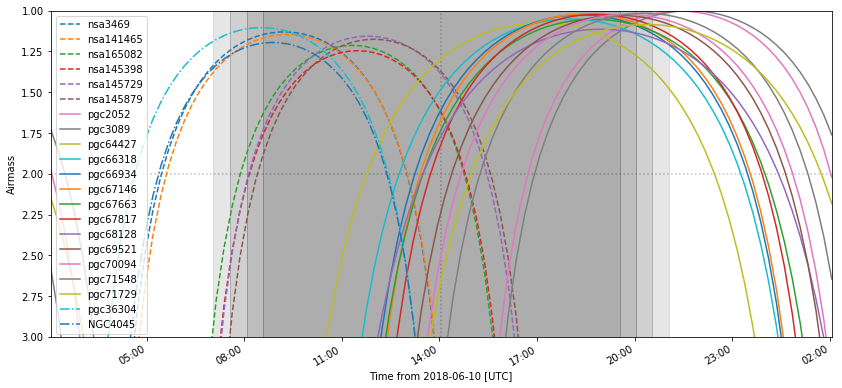

In [123]:
plt.figure(figsize=(14, 6))

plt.axvline(run_start.plot_date, ls=':', c='k', alpha=.25)
plt.axhline(2, ls=':', c='k', alpha=.25)

astroplan.plots.plot_airmass(nsatargs, aatobs, run_start,
                             style_kwargs=dict(linestyle='--'))
astroplan.plots.plot_airmass(destargs, aatobs, run_start, 
                             style_kwargs=dict(linestyle='-'),
                             brightness_shading=True)
astroplan.plots.plot_airmass(addedtargs, aatobs, run_start, 
                             style_kwargs=dict(linestyle='-.'),
                             brightness_shading=True)
plt.legend(loc=0);

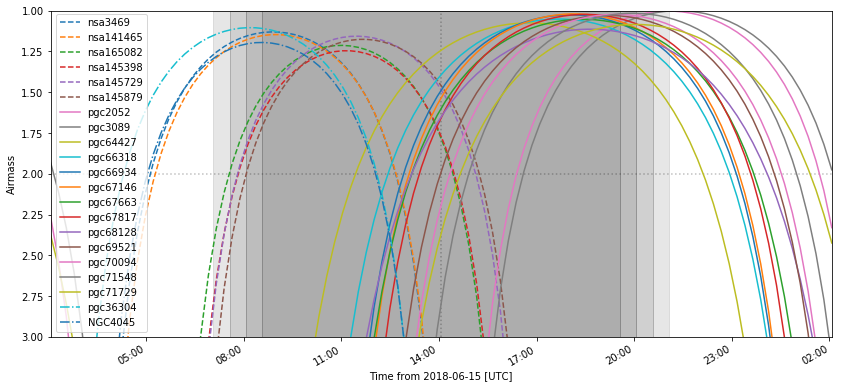

In [124]:
plt.figure(figsize=(14, 6))

plt.axvline(run_end.plot_date, ls=':', c='k', alpha=.25)
plt.axhline(2, ls=':', c='k', alpha=.25)

astroplan.plots.plot_airmass(nsatargs, aatobs, run_end,
                             style_kwargs=dict(linestyle='--'))
astroplan.plots.plot_airmass(destargs, aatobs, run_end, 
                             style_kwargs=dict(linestyle='-'),
                             brightness_shading=True)
astroplan.plots.plot_airmass(addedtargs, aatobs, run_end, 
                             style_kwargs=dict(linestyle='-.'),
                             brightness_shading=True)
plt.legend(loc=0);

In [125]:
{host['ID_STR']:host['coord'].to_string('hmsdms') for host in targethosts}

{'nsa141465': '12h28m50.64s -01d56m21.048s',
 'nsa145398': '14h39m11.04s +05d21m48.492s',
 'nsa145729': '14h58m22.56s -01d05m27.672s',
 'nsa145879': '15h09m49.44s +00d28m12.306s',
 'nsa165082': '14h29m40.32s +03d13m59.916s',
 'nsa3469': '12h23m54s -03d26m34.548s',
 'pgc2052': '00h34m15.492s -27d48m13.32s',
 'pgc3089': '00h52m42.36s -31d12m20.88s',
 'pgc64427': '20h17m17.28s -52d47m48.48s',
 'pgc66318': '21h11m52.08s -49d17m01.68s',
 'pgc66934': '21h32m35.28s -44d04m03.36s',
 'pgc67146': '21h40m12.96s -42d32m21.84s',
 'pgc67663': '21h56m09.6s -49d31m19.2s',
 'pgc67817': '22h00m32.88s -43d23m23.28s',
 'pgc68128': '22h08m34.32s -57d26m33.36s',
 'pgc69521': '22h41m52.32s -44d46m02.28s',
 'pgc70094': '22h57m13.44s -43d23m45.96s',
 'pgc71548': '23h28m43.44s -41d20m00.24s',
 'pgc71729': '23h33m16.8s -54d05m40.2s'}

## Fall 

In [116]:
run2_start = aatobs.midnight(Time('2018-10-1'), 'next')

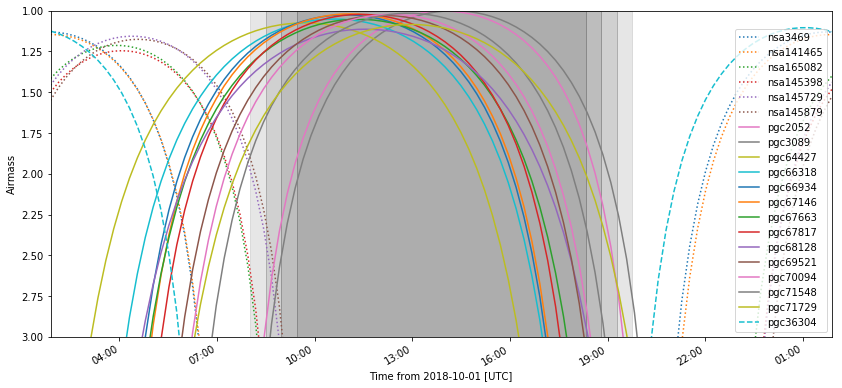

In [117]:
plt.figure(figsize=(14, 6))
astroplan.plots.plot_airmass(nsatargs, aatobs, run2_start,
                             style_kwargs=dict(linestyle=':'))
astroplan.plots.plot_airmass(destargs, aatobs, run2_start, 
                             style_kwargs=dict(linestyle='-'),
                             brightness_shading=True)
astroplan.plots.plot_airmass(addedtargs, aatobs, run2_start, 
                             style_kwargs=dict(linestyle='--'),
                             brightness_shading=True)
plt.legend(loc=0)

# Tests/Experiments 

## Compare Gaia to SDSS guide stars 

First need to get the Gaia catalog for an NSA object

In [240]:
from astroquery.gaia import Gaia

host = targethosts[targethosts['NSAID']==145729][0]
hostname = host['ID_STR']

fn = 'external_catalogs/astrometric/{}_gaia.ecsv'.format(hostname)
if os.path.exists(fn):
    print('File', fn, 'exists, skipping.')
else:
    gaiajob = Gaia.cone_search_async(host['coord'], radius=1*u.deg)
    gaia_tab = gaiajob.get_data()
    gaia_tab.write(fn, format='ascii.ecsv')

File external_catalogs/astrometric/nsa145729_gaia.ecsv exists, skipping.


In [186]:
sg = get_sdss_guidestars(hostname)
gg = get_gaia_guidestars(hostname)

Object catalog to Gaia offset: (<Angle 0.08164132 arcsec>, <Angle 0.07912354 arcsec>)


/Users/erik/miniconda3/envs/saga3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)
/Users/erik/miniconda3/envs/saga3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


In [244]:
targeting.sampled_imagelist(gg['RA'], gg['Dec'])

'name ra dec\n0 224.5906678370427 -1.2950137489728544\n1 225.474151384421 -1.0878728139581342\n2 223.72076787853638 -1.064198175815504\n3 224.69971909393655 -0.11598412583400089\n4 224.49166343911241 -0.24257767434462332\n5 224.62463741931958 -0.4230975491424615\n6 224.37369153842926 -0.4800222383547373\n7 224.19404148678638 -0.8220071323707093\n8 224.65252782545224 -1.0847146863650194\n9 224.1410110620503 -0.2071167177698061\n10 224.9363866472278 -1.4903310568051382\n11 224.67017945756132 -1.7733027482083552\n12 225.40836029262869 -1.400029760022471\n13 225.30634144468124 -0.7161621971578055\n14 224.83571123330182 -1.322937187697389\n15 224.0925068883515 -0.9660130396193417\n16 224.23739191824615 -0.8706479440961696\n17 224.8091204040939 -1.3722094648864824\n18 223.82874853027943 -1.6120410701977648\n19 224.77117744444803 -1.5807623766054963\n20 225.35423764341257 -0.5469297014793553\n21 224.60782395831689 -0.47159126202074086\n22 224.3219072547881 -0.5827964838166261\n23 225.31209348

They all look like reasonable guide stars...

In [190]:
gg = get_gaia_guidestars(hostname)

Object catalog to Gaia offset: (<Angle 0.08164132 arcsec>, <Angle 0.07912354 arcsec>)


/Users/erik/miniconda3/envs/saga3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)
/Users/erik/miniconda3/envs/saga3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


In [191]:
gstarcat = gg.meta['gstarcat']
gsc = SkyCoord(gstarcat['ra'], gstarcat['dec'])
obj_cat = saga_object_catalog.load(hostname)[0]
sstarcat = obj_cat[np.in1d(obj_cat['OBJID'], sg['TargetName'])]

(-0.3, 0.3)

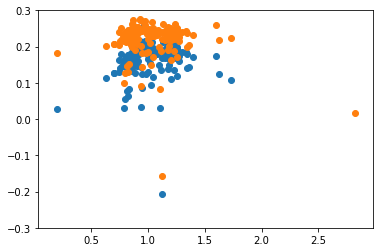

In [192]:
idx, d2d, _ = gsc.match_to_catalog_sky(sstarcat['coord'])
gcatmsk = gstarcat[d2d < 1*u.arcsec]
scatmsk = sstarcat[idx[d2d < 1*u.arcsec]]
ggmsk = gg[d2d<1*u.arcsec]

plt.scatter(gcatmsk['bp_rp'], gcatmsk['phot_g_mean_mag'] - scatmsk['r_mag'])
plt.scatter(gcatmsk['bp_rp'], ggmsk['Magnitude'] - scatmsk['r_mag'])
plt.ylim(-.3, .3)

That is strange.  Evans et al. 2018 would imply this should be ~ -0.1, not 0.2 to 0.3 ... unless this is a magnitude/SED effect?

In [194]:
gall = table.Table.read('external_catalogs/astrometric/nsa145729_gaia.ecsv')

/Users/erik/miniconda3/envs/saga3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)
/Users/erik/miniconda3/envs/saga3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


Text(0,0.5,'$G_-r$')

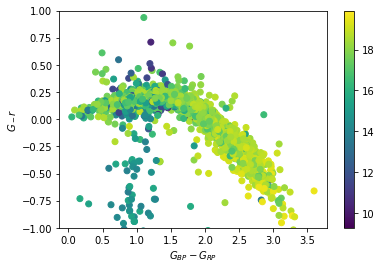

In [229]:
gmag = gall['phot_g_mean_mag']
gcut = gall[(gmag < 19)]
star_obj_cat = obj_cat[~obj_cat['is_galaxy']&(obj_cat['r_mag']>-9998)&(obj_cat['r_mag']<21)]
gsc = SkyCoord(gcut['ra'], gcut['dec'])
idx, d2d, _ = gsc.match_to_catalog_sky(star_obj_cat['coord'])

g_matches = gcut[d2d< 1*u.arcsec]
star_matches = star_obj_cat[idx[d2d< 1*u.arcsec]]

plt.scatter(g_matches['bp_rp'], g_matches['phot_g_mean_mag'] - star_matches['r_mag'], c=star_matches['r_mag'])
plt.ylim(-1, 1)
plt.colorbar()
plt.xlabel('$G_{BP}-G_{RP}$')
plt.ylabel('$G_-r$')

... is extinction included in these r-mags?

In [241]:
host['A_r']

0.132215

Nope that's still not it...?

### Compare updated nsa3469 to the previous base catalog 

In [512]:
ocat = saga_object_catalog.load('nsa3469')[0]
ocat_old = table.Table.read('base_catalogs/backups/base_v2_nsa3469.fits.gz')

/Users/erik/projects/saga/saga/build/lib/SAGA/objects/object_catalog.py:54: RuntimeWarning: invalid value encountered in subtract
  table[color] = table['{}_mag'.format(color[0])] - table['{}_mag'.format(color[1])]


In [514]:
del ocat['coord'] # joins don't work with mixins

j = table.join(ocat, ocat_old, 'OBJID', 'outer')

In [536]:
notmatch = j[j['RA_1']!=j['RA_2']]
notmatch['OBJID', 'SATS_1', 'SATS_2']

OBJID,SATS_1,SATS_2
int64,int16,int16
667634,0,--
3066390000000001475,-1,--
3066390000000001476,--,-1
3095180000000004064,--,-1
3109520000000002200,--,-1
3109520000000002201,-1,--
3109530000000000033,--,-1
3109530000000000035,-1,--
3109530000000003600,--,-1


In [549]:
nsat = notmatch[0]
nsat

OBJID,RA_1,DEC_1,REMOVE_1,is_galaxy_1,morphology_info_1,radius_1,radius_err_1,u_mag_1,g_mag_1,r_mag_1,i_mag_1,z_mag_1,y_mag_1,u_err_1,g_err_1,r_err_1,i_err_1,z_err_1,y_err_1,survey_1,OBJID_sdss_1,RA_sdss_1,DEC_sdss_1,REMOVE_sdss_1,is_galaxy_sdss_1,morphology_info_sdss_1,radius_sdss_1,radius_err_sdss_1,u_mag_sdss_1,g_mag_sdss_1,r_mag_sdss_1,i_mag_sdss_1,z_mag_sdss_1,y_mag_sdss_1,u_err_sdss_1,g_err_sdss_1,r_err_sdss_1,i_err_sdss_1,z_err_sdss_1,y_err_sdss_1,OBJID_decals_1,RA_decals_1,DEC_decals_1,REMOVE_decals_1,is_galaxy_decals_1,morphology_info_decals_1,radius_decals_1,radius_err_decals_1,u_mag_decals_1,g_mag_decals_1,r_mag_decals_1,i_mag_decals_1,z_mag_decals_1,y_mag_decals_1,u_err_decals_1,g_err_decals_1,r_err_decals_1,i_err_decals_1,z_err_decals_1,y_err_decals_1,HOST_NSAID_1,HOST_NSA1ID_1,HOST_RA_1,HOST_DEC_1,HOST_DIST_1,HOST_VHOST_1,HOST_MK_1,HOST_MR_1,HOST_MG_1,HOST_SAGA_NAME_1,HOST_NGC_1,HOST_PGC_1,RHOST_ARCM_1,RHOST_KPC_1,OBJ_NSAID_1,SPEC_REPEAT_1,SPEC_Z_1,SPEC_Z_ERR_1,ZQUALITY_1,SPECOBJID_1,MASKNAME_1,TELNAME_1,EM_ABS_1,HELIO_CORR_1,RA_spec_1,DEC_spec_1,sb_r_1,SATS_1,log_sm_1,ug,ug_err,gr,gr_err,ri,ri_err,iz,iz_err,zy,zy_err,rz,rz_err,RA_2,DEC_2,REMOVE_2,is_galaxy_2,morphology_info_2,radius_2,radius_err_2,u_mag_2,g_mag_2,r_mag_2,i_mag_2,z_mag_2,y_mag_2,u_err_2,g_err_2,r_err_2,i_err_2,z_err_2,y_err_2,survey_2,OBJID_sdss_2,RA_sdss_2,DEC_sdss_2,REMOVE_sdss_2,is_galaxy_sdss_2,morphology_info_sdss_2,radius_sdss_2,radius_err_sdss_2,u_mag_sdss_2,g_mag_sdss_2,r_mag_sdss_2,i_mag_sdss_2,z_mag_sdss_2,y_mag_sdss_2,u_err_sdss_2,g_err_sdss_2,r_err_sdss_2,i_err_sdss_2,z_err_sdss_2,y_err_sdss_2,OBJID_decals_2,RA_decals_2,DEC_decals_2,REMOVE_decals_2,is_galaxy_decals_2,morphology_info_decals_2,radius_decals_2,radius_err_decals_2,u_mag_decals_2,g_mag_decals_2,r_mag_decals_2,i_mag_decals_2,z_mag_decals_2,y_mag_decals_2,u_err_decals_2,g_err_decals_2,r_err_decals_2,i_err_decals_2,z_err_decals_2,y_err_decals_2,HOST_NSAID_2,HOST_NSA1ID_2,HOST_RA_2,HOST_DEC_2,HOST_DIST_2,HOST_VHOST_2,HOST_MK_2,HOST_MR_2,HOST_MG_2,HOST_SAGA_NAME_2,HOST_NGC_2,HOST_PGC_2,RHOST_ARCM_2,RHOST_KPC_2,OBJ_NSAID_2,SPEC_REPEAT_2,SPEC_Z_2,SPEC_Z_ERR_2,ZQUALITY_2,SPECOBJID_2,MASKNAME_2,TELNAME_2,EM_ABS_2,HELIO_CORR_2,RA_spec_2,DEC_spec_2,sb_r_2,SATS_2,log_sm_2
int64,float64,float64,int64,bool,int32,float32,float32,float64,float32,float32,float64,float32,float64,float64,float32,float32,float64,float32,float64,str6,int64,float64,float64,int64,bool,int32,float32,float32,float64,float32,float32,float64,float32,float64,float64,float32,float32,float64,float32,float64,int64,float64,float64,int64,bool,int32,float32,float32,float64,float32,float32,float64,float32,float64,float64,float32,float32,float64,float32,float64,int32,int32,float32,float32,float32,float32,float32,float32,float32,str48,int32,int32,float32,float32,int32,str48,float32,float32,int16,str48,str48,str6,int16,bool,float64,float64,float32,int16,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,int64,bool,int32,float32,float32,float64,float32,float32,float64,float32,float64,float64,float32,float32,float64,float32,float64,bytes6,int64,float64,float64,int64,bool,int32,float32,float32,float64,float32,float32,float64,float32,float64,float64,float32,float32,float64,float32,float64,int64,float64,float64,int64,bool,int32,float32,float32,float64,float32,float32,float64,float32,float64,float64,float32,float32,float64,float32,float64,int32,int32,float32,float32,float32,float32,float32,float32,float32,bytes48,int32,int32,float32,float32,int32,bytes48,float32,float32,int16,bytes48,bytes48,bytes6,int16,bool,float64,float64,float32,int16,float64
667634,186.28988312104642,-3.650951666385364,0,True,69,3.2260087,0.0,20.403911590576172,20.104137,19.667616,19.071447372436523,19.019974,99.0,0.2365889996290207,0.089075685,0.08529498,0.08152511715888977,0.28358462,99.0,NSA,1237650760245838115,186.28914357117526,-3.6518246779813537,0,True,3,2.2175121,0.07880783,20.13367462

In [550]:
nsatsc = SkyCoord(nsat['RA_1'], nsat['DEC_1'], unit=u.deg)
oldsc = SkyCoord(ocat_old['RA'], ocat_old['DEC'], unit=u.deg)

seps = nsatsc.separation(oldsc)
print('min', np.min(seps.arcsec))
ocat_old[np.argmin(seps)]

min 4.0696631248491855


OBJID,RA,DEC,REMOVE,is_galaxy,morphology_info,radius,radius_err,u_mag,g_mag,r_mag,i_mag,z_mag,y_mag,u_err,g_err,r_err,i_err,z_err,y_err,survey,OBJID_sdss,RA_sdss,DEC_sdss,REMOVE_sdss,is_galaxy_sdss,morphology_info_sdss,radius_sdss,radius_err_sdss,u_mag_sdss,g_mag_sdss,r_mag_sdss,i_mag_sdss,z_mag_sdss,y_mag_sdss,u_err_sdss,g_err_sdss,r_err_sdss,i_err_sdss,z_err_sdss,y_err_sdss,OBJID_decals,RA_decals,DEC_decals,REMOVE_decals,is_galaxy_decals,morphology_info_decals,radius_decals,radius_err_decals,u_mag_decals,g_mag_decals,r_mag_decals,i_mag_decals,z_mag_decals,y_mag_decals,u_err_decals,g_err_decals,r_err_decals,i_err_decals,z_err_decals,y_err_decals,HOST_NSAID,HOST_NSA1ID,HOST_RA,HOST_DEC,HOST_DIST,HOST_VHOST,HOST_MK,HOST_MR,HOST_MG,HOST_SAGA_NAME,HOST_NGC,HOST_PGC,RHOST_ARCM,RHOST_KPC,OBJ_NSAID,SPEC_REPEAT,SPEC_Z,SPEC_Z_ERR,ZQUALITY,SPECOBJID,MASKNAME,TELNAME,EM_ABS,HELIO_CORR,RA_spec,DEC_spec,sb_r,SATS,log_sm
int64,float64,float64,int64,bool,int32,float32,float32,float64,float32,float32,float64,float32,float64,float64,float32,float32,float64,float32,float64,bytes6,int64,float64,float64,int64,bool,int32,float32,float32,float64,float32,float32,float64,float32,float64,float64,float32,float32,float64,float32,float64,int64,float64,float64,int64,bool,int32,float32,float32,float64,float32,float32,float64,float32,float64,float64,float32,float32,float64,float32,float64,int32,int32,float32,float32,float32,float32,float32,float32,float32,bytes48,int32,int32,float32,float32,int32,bytes48,float32,float32,int16,bytes48,bytes48,bytes6,int16,bool,float64,float64,float32,int16,float64
3095180000000004064,186.2892062262206,-3.6518580967675636,0,True,69,2.5225127,9999.0,99.0,19.241293,18.812649,99.0,18.501104,99.0,99.0,0.005536317,0.0049096895,99.0,0.008456782,99.0,decals,1237650760245838115,186.28914357117526,-3.6518246779813537,0,True,3,2.2175121,0.07880783,20.13367462158203,19.20518,18.841427,18.57540512084961,18.406008,99.0,0.10479016602039337,0.022609735,0.02977314,0.029728418216109276,0.09791481,99.0,3095180000000004064,186.2892062262206,-3.6518580967675636,0,True,69,2.5225127,9999.0,99.0,19.241293,18.812649,99.0,18.501104,99.0,99.0,0.005536317,0.0049096895,99.0,0.008456782,99.0,3469,19609,185.975,-3.44293,29.8369,2004.28,-23.4597,-20.4264,-19.6124,,4348,40284,22.609608,196.23195,-1,,nan,nan,-1,,,,-1,False,nan,nan,22.817265,-1,nan


In [544]:
ocat_old['OBJID'][np.argmin(seps)] in ocat['OBJID']

False

Curious.  The added object 667634 has the wrong coordinates...? But it's been removed

Now check the zquality's to ensure they are different for the observed objects

In [537]:
notmatch = j[j['ZQUALITY_1']!=j['ZQUALITY_2']]
notmatch['OBJID', 'ZQUALITY_1', 'ZQUALITY_2']


OBJID,ZQUALITY_1,ZQUALITY_2
int64,int16,int16
667634,4,--
1237650369410564480,2,-1
1237650369410564688,2,-1
1237650369410629877,4,-1
1237650369410629880,4,-1
1237650369410629892,4,-1
1237650369410629906,4,-1
1237650369410629925,4,-1
1237650369410630114,3,-1


## Cumulatizing target tables 

In [305]:
s="""host_id   100 150 180 200 300 400 500 600 700 800  900 
--------- --- --- --- --- --- --- --- --- --- ---- ----
  pgc2052   3   0   9  11  26 288  50  82  12  748 1158
  pgc3089  10   2   0  33 183 493  50  69  16  752 1414
  nsa3469   0   0   4   1   8  90  50  13   5  540 2042
nsa141465   0   1   9   1  15  60  49   6   4  286 2505
nsa165082   2   6   4  12 210 613  50   8   9  938 1923
nsa145398   0   1   0  20 300 673  50  20  16  960 1871
nsa145729   0   0  13   0  12  29  49   1   3  376 2042
nsa145879   0   0   5   0  25 372  50  35  32  696 3120
 pgc64427   9   0   0  36  51 125  50 190 230  158 2942
 pgc66318   3   1   1   4  11  50  50  53  77  177 2331
 pgc66934   2   0   2   0   5  30  50  39 123  204 2508
 pgc67146   1   1   0  64 120 266  50 140 105  432 2646
 pgc67663   0   1   0  64 136 435  50  53  83  515 1628
 pgc67817   0   0  16  14  54 115  50  63 104  289 2121
 pgc68128   0   0   0 104 190 578  50  79  93  839 1661
 pgc69521   0   0   0  99 155 522  50  82 129  783 1946
 pgc70094  35   1   0  89 155 486  50  85  74  843 1764
 pgc71548   0   0   0  62 241 698  50  59  53 1185 1159
 pgc71729   0   0   0  44 115 359  50  89  99  592 2123"""
tab = table.Table.read(s.split('\n'), format='ascii.fixed_width_two_line', delimiter=' ')

pricols = tab.colnames[1:]
cumtab = tab.copy()
for row in cumtab:
    cum = np.cumsum([row[c] for c in pricols])
    for c, n in zip(pricols, cum):
        row[c] = n
for c in pricols:
    cumtab[c].name = '<='+c
    
import io 
sio = io.StringIO()
cumtab.write(sio, format='ascii.fixed_width_two_line')
sio.seek(0)
print(sio.read())

  host_id <=100 <=150 <=180 <=200 <=300 <=400 <=500 <=600 <=700 <=800 <=900
--------- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- -----
  pgc2052     3     3    12    23    49   337   387   469   481  1229  2387
  pgc3089    10    12    12    45   228   721   771   840   856  1608  3022
  nsa3469     0     0     4     5    13   103   153   166   171   711  2753
nsa141465     0     1    10    11    26    86   135   141   145   431  2936
nsa165082     2     8    12    24   234   847   897   905   914  1852  3775
nsa145398     0     1     1    21   321   994  1044  1064  1080  2040  3911
nsa145729     0     0    13    13    25    54   103   104   107   483  2525
nsa145879     0     0     5     5    30   402   452   487   519  1215  4335
 pgc64427     9     9     9    45    96   221   271   461   691   849  3791
 pgc66318     3     4     5     9    20    70   120   173   250   427  2758
 pgc66934     2     2     4     4     9    39    89   128   251   455  2963
 pgc67146   

## Fractional completenesses

In [211]:
s="""
host_id   <150 <200 <300 <400 <500 <600 <700 <800 <900
--------- ---- ---- ---- ---- ---- ---- ---- ---- ----
  pgc2052   23   23   61  304  860  910  992 1004 1752
  pgc3089   10   12   45  228  721  771  840  856 1608
  nsa3469    0    0    4  148  659  709  725  734 1295
nsa141465    0    2    9  104  332  382  396  403  734
nsa165082    2    8   20  231  845  895  903  912 1850
nsa145398    0    1   21  321  994 1044 1064 1080 2040
nsa145729    0    2    5  110  369  419  433  449  985
nsa145879    0    0    8  213  729  779  814  846 1542
 pgc64427    9    9   45   96  221  271  461  691  849
 pgc66318   29   30   46  132  313  363  468  548  751
 pgc66934   20   20   38  103  273  323  417  552  793
 pgc67146    1    2   66  186  452  502  642  747 1179
 pgc67663    0    1   65  201  636  686  739  822 1337
 pgc67817    0    1   46  116  346  396  467  573  874
 pgc68128    0    0  104  294  872  922 1001 1094 1933
 pgc69521    0    0   99  254  776  826  908 1037 1820
 pgc70094   35   36  125  280  766  816  901  975 1818
 pgc71548    0    0   62  303 1001 1051 1110 1163 2348
 pgc71729    0    0   44  159  518  568  657  756 1348
 """
tstart = table.Table.read(s.split('\n'), format='ascii.fixed_width_two_line')
s="""
 host_id  <150 <180 <200 <300 <400 <500 <600 <700 <800 <900
--------- ---- ---- ---- ---- ---- ---- ---- ---- ---- ----
  pgc2052    3    3   12   23   49  337  387  469  481 1229
  pgc3089   10   12   12   45  228  721  771  840  856 1608
  nsa3469    0    0    4    5   13  103  153  166  171  711
nsa141465    0    1   10   11   26   86  135  141  145  431
nsa165082    2    8   12   24  234  847  897  905  914 1852
nsa145398    0    1    1   21  321  994 1044 1064 1080 2040
nsa145729    0    0   13   13   25   53  103  104  107  479
nsa145879    0    0    5    5   30  402  452  487  519 1215
 pgc64427    4    4   10   14   23   53  103  195  422  553
 pgc66318    3    4    5    9   20   70  120  173  250  427
 pgc66934    2    2    4    4    9   39   89  128  251  455
 pgc67146    1    2    2   66  186  452  502  642  747 1179
 pgc67663    0    1    1   65  201  636  686  739  822 1337
 pgc67817    0    0    6   15   21   49   99  106  131  376
 pgc68128    0    0    0  104  294  872  922 1001 1094 1933
 pgc69521    0    0    0   99  254  776  826  908 1037 1820
 pgc70094   35   36   36  125  280  766  816  901  975 1818
 pgc71548    0    0    0   62  303 1001 1051 1110 1163 2348
 pgc71729    0    0    0   44  159  518  568  657  756 1348
 """
tnow = table.Table.read(s.split('\n'), format='ascii.fixed_width_two_line')

In [226]:
tcompl = table.Table()
tcompl['host_id'] = tnow['host_id']
for cnm in tstart.colnames[1:]:
    tcompl[cnm] = tnow[cnm]/tstart[cnm]
    tcompl[cnm][~np.isfinite(tcompl[cnm])] = -1
    tcompl[cnm].format = '.2f'
tcompl

/Users/erik/miniconda3/envs/saga3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/Users/erik/miniconda3/envs/saga3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


host_id,<150,<200,<300,<400,<500,<600,<700,<800,<900
str9,float64,float64,float64,float64,float64,float64,float64,float64,float64
pgc2052,0.13,0.52,0.38,0.16,0.39,0.43,0.47,0.48,0.70
pgc3089,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
nsa3469,-1.00,-1.00,1.25,0.09,0.16,0.22,0.23,0.23,0.55
nsa141465,-1.00,5.00,1.22,0.25,0.26,0.35,0.36,0.36,0.59
nsa165082,1.00,1.50,1.20,1.01,1.00,1.00,1.00,1.00,1.00
nsa145398,-1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
nsa145729,-1.00,6.50,2.60,0.23,0.14,0.25,0.24,0.24,0.49
nsa145879,-1.00,-1.00,0.62,0.14,0.55,0.58,0.60,0.61,0.79
pgc64427,0.44,1.11,0.31,0.24,0.24,0.38,0.42,0.61,0.65


In [227]:
import io

sio = io.StringIO()
tcompl.write(sio, format='ascii.fixed_width_two_line')

sio.seek(0)
print(sio.read())

  host_id  <150  <200 <300 <400 <500 <600 <700 <800 <900
--------- ----- ----- ---- ---- ---- ---- ---- ---- ----
  pgc2052  0.13  0.52 0.38 0.16 0.39 0.43 0.47 0.48 0.70
  pgc3089  1.00  1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00
  nsa3469 -1.00 -1.00 1.25 0.09 0.16 0.22 0.23 0.23 0.55
nsa141465 -1.00  5.00 1.22 0.25 0.26 0.35 0.36 0.36 0.59
nsa165082  1.00  1.50 1.20 1.01 1.00 1.00 1.00 1.00 1.00
nsa145398 -1.00  1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00
nsa145729 -1.00  6.50 2.60 0.23 0.14 0.25 0.24 0.24 0.49
nsa145879 -1.00 -1.00 0.62 0.14 0.55 0.58 0.60 0.61 0.79
 pgc64427  0.44  1.11 0.31 0.24 0.24 0.38 0.42 0.61 0.65
 pgc66318  0.10  0.17 0.20 0.15 0.22 0.33 0.37 0.46 0.57
 pgc66934  0.10  0.20 0.11 0.09 0.14 0.28 0.31 0.45 0.57
 pgc67146  1.00  1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00
 pgc67663 -1.00  1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00
 pgc67817 -1.00  6.00 0.33 0.18 0.14 0.25 0.23 0.23 0.43
 pgc68128 -1.00 -1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00
 pgc69521 -1.00 -1.00 1.00 1.00

## pgc67817 maybe sats

In [185]:
cat = saga_object_catalog.load('pgc67817')[0]
psats = cat[np.in1d(cat['OBJID'], [int(i) for i in '219809642 247105220 247126789 219810724 219810478 219809584 247092888'.split()])]

In [186]:
psats

OBJID,RA,DEC,REMOVE,is_galaxy,morphology_info,radius,radius_err,u_mag,g_mag,r_mag,i_mag,z_mag,y_mag,u_err,g_err,r_err,i_err,z_err,y_err,survey,OBJID_des,RA_des,DEC_des,REMOVE_des,is_galaxy_des,morphology_info_des,radius_des,radius_err_des,u_mag_des,g_mag_des,r_mag_des,i_mag_des,z_mag_des,y_mag_des,u_err_des,g_err_des,r_err_des,i_err_des,z_err_des,y_err_des,HOST_NSAID,HOST_NSA1ID,HOST_RA,HOST_DEC,HOST_DIST,HOST_VHOST,HOST_MK,HOST_MR,HOST_MG,HOST_SAGA_NAME,HOST_NGC,HOST_PGC,RHOST_ARCM,RHOST_KPC,OBJ_NSAID,SPEC_REPEAT,SPEC_Z,SPEC_Z_ERR,ZQUALITY,SPECOBJID,MASKNAME,TELNAME,EM_ABS,HELIO_CORR,RA_spec,DEC_spec,sb_r,SATS,log_sm,ug,ug_err,gr,gr_err,ri,ri_err,iz,iz_err,zy,zy_err,rz,rz_err,coord
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"deg,deg"
int64,float64,float64,int64,bool,int32,float64,float32,float64,float32,float32,float32,float32,float32,float64,float32,float32,float32,float32,float32,str6,int64,float64,float64,int64,bool,int32,float64,float32,float64,float32,float32,float32,float32,float32,float64,float32,float32,float32,float32,float32,int32,int32,float32,float32,float32,float32,float32,float32,float32,str48,int32,int32,float32,float32,int32,str48,float32,float32,int16,str48,str48,str6,int16,bool,float64,float64,float64,int16,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,object
247126789,329.757864387139,-43.7531101177325,0,True,3,2.85092029094696,0.0,99.0,18.691399,18.378174,18.29684,18.182585,18.1599,99.0,0.00510312,0.00493872,0.00702568,0.0149544,0.0408227,des,247126789,329.757864387139,-43.7531101177325,0,True,3,2.85092029094696,0.0,99.0,18.691399,18.378174,18.29684,18.182585,18.1599,99.0,0.00510312,0.00493872,0.00702568,0.0149544,0.0408227,-1,-1,330.137,-43.3898,35.8032,2466.0,0.0,0.0,0.0,,7166,67817,27.327845,284.6091,-1,AAT,0.008598246,10.0,4,139,pgc67817_1_MG.mz,AAT,-1,True,329.75789487419297,-43.75311988425213,22.64854887408772,1,nan,80.30860137939453,99.00000013152442,0.3132248,0.0071016047,0.08133316,0.008587848,0.114255905,0.016522538,0.022684097,0.04347559,0.19558907,0.01574881,"329.757864387139,-43.7531101177325"
219809642,330.126951306606,-43.1300400912041,0,True,3,10.8290067405701,0.0,99.0,17.818153,17.469044,17.606619,17.53608,17.5466,99.0,0.00832159,0.00612319,0.0109914,0.0180992,0.0547932,des,219809642,330.126951306606,-43.1300400912041,0,True,3,10.8290067405701,0.0,99.0,17.818153,17.469044,17.606619,17.53608,17.5466,99.0,0.00832159,0.00612319,0.0109914,0.0180992,0.0547932,-1,-1,330.137,-43.3898,35.8032,2466.0,0.0,0.0,0.0,,7166,67817,15.591778,162.38358,-1,AAT,0.0075082458,10.0,4,294,pgc67817_1_MG.mz,AAT,-1,True,330.12693699003677,-43.13002828204736,24.637436522797284,1,nan,81.18184661865234,99.0000003497417,0.34910965,0.010331617,-0.13757515,0.012581904,0.070539474,0.021175267,-0.010520935,0.05770508,-0.067035675,0.019106923,"330.126951306606,-43.1300400912041"
219809584,330.162240323829,-43.1184142070258,0,True,3,1.39074427890778,0.0,99.0,20.323376,20.161736,20.860159,20.132061,20.3527,99.0,0.0254918,0.0142276,0.0541156,0.0499507,0.146591,des,219809584,330.162240323829,-43.1184142070258,0,True,3,1.39074427890778,0.0,99.0,20.323376,20.161736,20.860159,20.132061,20.3527,99.0,0.0254918,0.0142276,0.0541156,0.0499507,0.146591,-1,-1,330.137,-43.3898,35.8032,2466.0,0.0,0.0,0.0,,7166,67817,16.320461,169.97253,-1,,nan,nan,-1,,,,-1,False,nan,nan,22.873421615879455,-1,nan,78.6766242980957,99.00000328197912,0.16164017,0.029193431,-0.6984234,0.05595465,0.7280979,0.0736449,-0.22063828,0.15486766,0.02967453,0.051937435,"330.162240323829,-43.1184142070258"
247105220,330.433067173899,-43.4127167406354,0,True,3,1.47061310720444,0.0,99.0,21.056229,20.55273,20.28322,20.13178,20.2183,99.0,0.0251481,0.01674,0.0237253,0.0346409,0.122227,des,247105220,330.433067173899,-43.4127167406354,0,True,3,1.47061310720444,0.0,99.0,21.056229,20.55273,20.28322,20.13178,20.2183,99.0,0.0251481,0.01674,0.0237253,0.0346409,0.122227,-1,-1,330.137,-43.3

## Check fibers from list file (mostly for guidestar when on sky) 

In [187]:
lt, sc, _ = aat.load_lis_file('aat_targets_jun2018/nsa13927_1_p0.lis')
lt['ra'] = sc.ra.deg
lt['dec'] = sc.dec.deg

In [172]:
lt[lt['codes']=='F']

fibnums,ids,ras,decs,codes,pris,mags,comments,ra,dec
int64,str19,str12,str12,str1,int64,float64,str7,float64,float64
50,1237651752400322581,12:05:30.220,+01:17:11.74,F,9,13.7,Guide,181.37591666666665,1.2865944444444444
150,1237651735220191273,12:01:01.170,+01:36:51.22,F,9,12.73,Guide,180.254875,1.6142277777777778
200,1237651735756996625,12:00:13.470,+01:57:34.90,F,9,13.37,Guide,180.05612499999998,1.9596944444444444
250,1237651754010345584,12:00:27.590,+02:33:38.73,F,9,13.62,Guide,180.1149583333333,2.5607583333333332
300,1237651736831000598,12:02:52.900,+02:45:30.57,F,9,13.29,Guide,180.72041666666664,2.7584916666666666
350,1237651754010935313,12:05:18.440,+02:34:09.82,F,9,13.01,Guide,181.32683333333333,2.5693944444444443
400,1237651735757651990,12:06:19.120,+01:55:08.36,F,9,13.91,Guide,181.57966666666664,1.9189888888888886


In [177]:
make_decals_viewer_cutouts(lt[lt['codes']=='F'], 'sdss', namecol='fibnums', ncols=4)

50,150,200,250
300,350,400,


In [176]:
make_decals_viewer_cutouts(lt[lt['codes']=='F'], 'unwise-w1w2', namecol='mags', ncols=4, zoom=17)

13.7,12.73,13.37,13.62
13.29,13.01,13.91,
